# Search: Solving a Maze Using a Goal-based Agent

Student Name: Travis Peck

I have used the following AI tools: None

I understand that my submission needs to be my own work: TP

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



In [2]:
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
import maze_helper as mh
import matplotlib.pyplot as plt
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)
    
 
# Given a list of mazes, will return an animation of the search
# Based on show_maze but modified to generate animation
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes."""
        
        #if result['path'] != None:       
            #print(f"Path length: {len(result['path'])-1}")
            #print(f"Reached squares: {len(result['reached'])}")
            #print(f"Action sequence: {result['actions']}")
        #else:
            #print("No solution found.")
        #
        
        mazes = result
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = mh.find_pos(result[0], what ='G')
        start = mh.find_pos(result[0], what ='S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani

__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [3]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

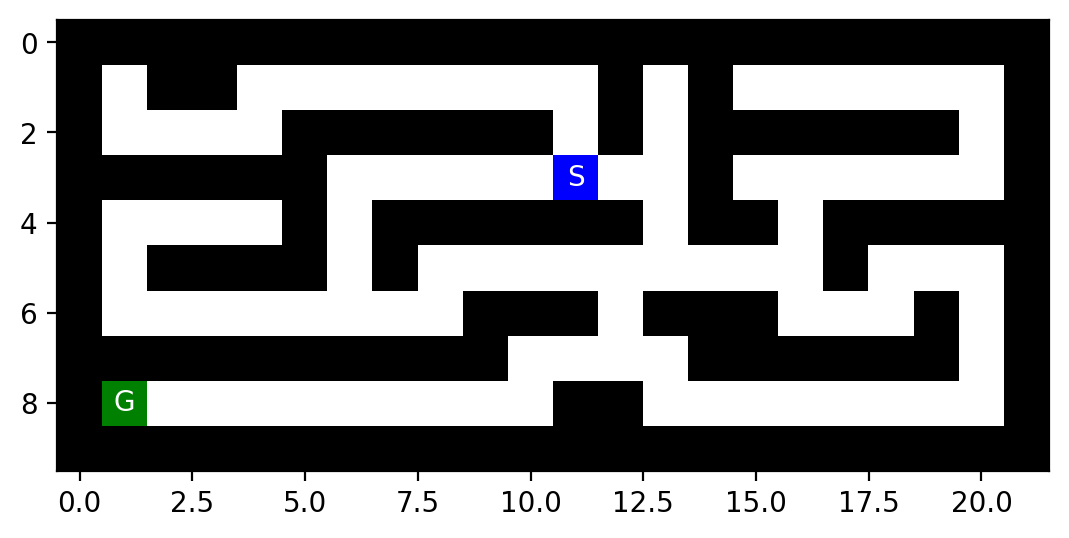

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [5]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [6]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/travisjpeck/Desktop/CS7320-AI-master/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [7]:
#Hn, star, and depth are given default values that are completely ignored in search functions that don't use them
#This is why when we print the heuristic for BFS for example, it will be 100000000. But it doesn't matter because its not used
class Node:
    def __init__(self, pos, parent, action, cost=0, hn=1000000, star=100000, depth=0):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.hn = hn             # Manhattan distance from the goal, this will be adjusted in the functions
        self.star = star         # A* value that will be changed in the respective functions
        self.depth = depth       # Depth that will be used in respective functions

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}; hn = {self.hn}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

### Initial state:
The initial state for these mazes is the state where all searchable nodes are unsearched, with starting node S and goal node G. 
### Actions: 
The available actions are to move north, east, south and west. A = {N, E, S, W}
### Transition model: 
If an action is valid, meaning that the selected node is not a wall, then the actions N, E, S, W add the nodes in those respective directions into the frontier list as well as the reached list if they were successfully added. This will be implemented by checking if the node in the respective direction is not a wall, checking if it is in reached or the current path from the root, and adding the node to the frontier if all of this is successful. Then the frontier is popped either in FIFO or LIFO depending on the search algorithm, and all child nodes of the popped node are checked. And the process repeats.
### Goal State: 
The goal state is if the goal node is the most recent popped node from the frontier.
### Path cost:
The path cost is the number of nodes on the root back to the starting node from any given node. In other words, each successful action costs one. The total of the cost is consequently the number of nodes on the path from the root.


Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

### n - State Space Size:
The state space size is the number of squares the agent can be in. In other words, the number of white squares is the state space size of any given maze.
### d - Depth of the Optimal Solution:
The depth of the optimal solution is the cost of the shortest solution. Meaning, the depth of the most optimal solution is the cost of the path that leads to the smallest number of nodes from the S node to the G node. The amount of nodes in the path from the root is the depth, so the depth of the optimal solution would be the amount of nodes in the path from the root that of the shortest path from S to G.
### m - Maximum Depth of Tree:
The maximum depth of the tree is the length of the path from the start node to the most costliest node that was searched. Another way to describe it is the length of the path from the start node to the furthest node from the start node that was searched. 
### b - Maximum branching factor:
The brancing factor is the maximum number of child nodes of a given node that was found during the search. For any given maze, it would be the number of children of the node that has the most children. This can be up to 4, as there are only 4 directions: N,E,S,W.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [10]:
import maze_helper as mh

def BFS(startNode, maze):
    #Declaring all the variables we will use
    #Frontier list
    frontier = []
    #Reached list
    reached = []
    #List of mazes to use as an animation for debugging
    mazes = []
    #Nodes will be stored in a dictionary with node(x, y) as the name and the actual node object as the value
    nodes = {}
    #Default cost for a node
    cost = 0
    #Number of nodes expanded that will increase each time we add a node
    nodesexpanded = 0
    #Max frontier that will be stored throughout the iteration
    maxfrontier = 0
    #Max tree that will be stored throughout the iteration
    maxtree = 0

    #Appending the frontier and reached with the start node
    frontier.append(startNode)
    reached.append(startNode.pos)
    #Adding the start node to the dictionary 
    name = f'node{startNode.pos}'
    nodes[name] = startNode
    #Adding the initial maze to the maze list
    mazes.append(maze)

    #While the frontier is not empty...
    while len(frontier) > 0:
        #Getting the max length of the frontier
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)
            
        #Appending list of mazes for animation (debugging)
        maze = np.copy(maze)
        mazes.append(maze)
        
        #Setting reached squares in the maze to be grey if they arent the goal or the start node
        for x,y in reached:
            if maze[x][y] !=  'G' and maze[x][y] != 'S':
                maze[x][y] = '.'
        for node in frontier:
            x,y = node.pos
            if maze[x][y] != 'G' and maze[x][y] != 'S':
                maze[x][y] = 'F'
        
        #Popping a node from the front in a first in first out order
        currentNode = frontier.pop(0)
        currentPos = currentNode.pos

        #Getting the max tree length throughout the iteration
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount

        #Checking if the current node is the goal, and if so, defining the path in the maze to debug
        x,y = currentNode.pos
        if maze[x][y] == 'G':
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze) 
            print('Goal found!')
            return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree

        #North direction 
        
        #If north direction is valid, appending frontier with the child node
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]-1, currentPos[1])) == 'G':
            childPos = (currentPos[0]-1, currentPos[1])
            if childPos not in reached:
                #If child node not already found, appending the dictionary of nodes
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'N', cost)
                #Setting the cost of the child node
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                #Increasing the number of nodes expanded if the child node was added to the frontier
                nodesexpanded += 1

        #East direction

        #Doing all the same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]+1)) == 'G':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in reached:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'E', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

        #South direction

        #Doing all the same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]+1, currentPos[1])) == 'G':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'S', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

        #West direction

        #Doing all the same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]-1)) == 'G':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in reached:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'W', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

Goal found!
Number of nodes expanded: 93
Max frontier: 9
Max tree: 20
Nodes in memory: 94
Node - pos = (8, 1); action = W; cost = 20; hn = 1000000


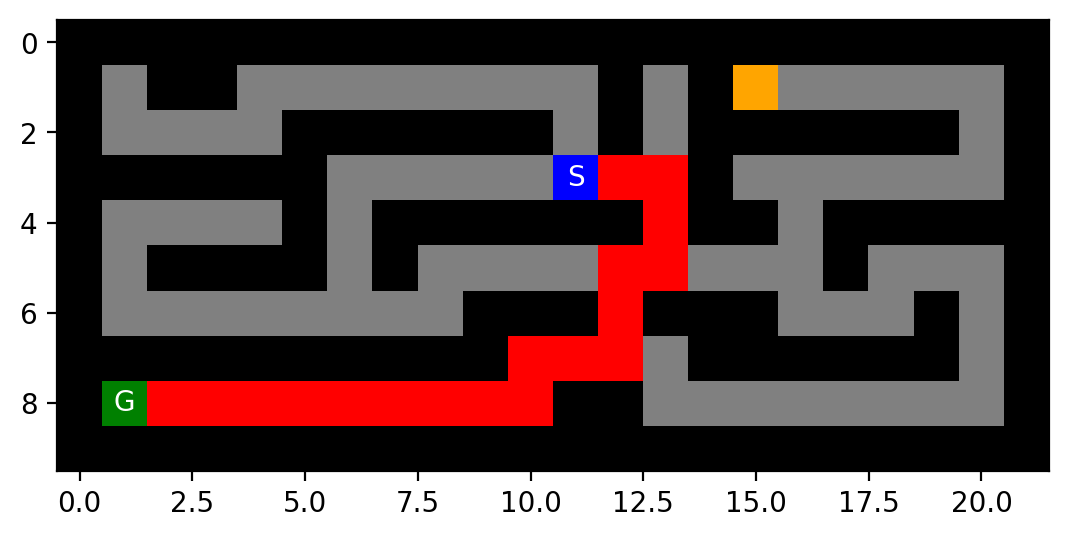

In [117]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 271
Max frontier: 9
Max tree: 69
Nodes in memory: 272
Node - pos = (16, 1); action = W; cost = 69; hn = 1000000


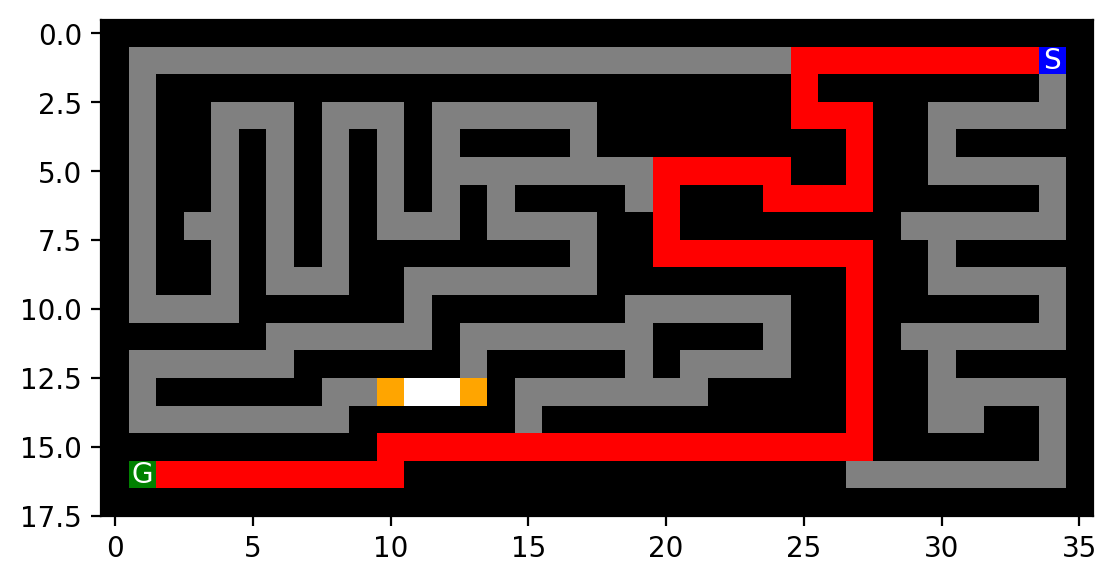

In [12]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 624
Max frontier: 8
Max tree: 211
Nodes in memory: 625
Node - pos = (35, 1); action = S; cost = 211; hn = 1000000


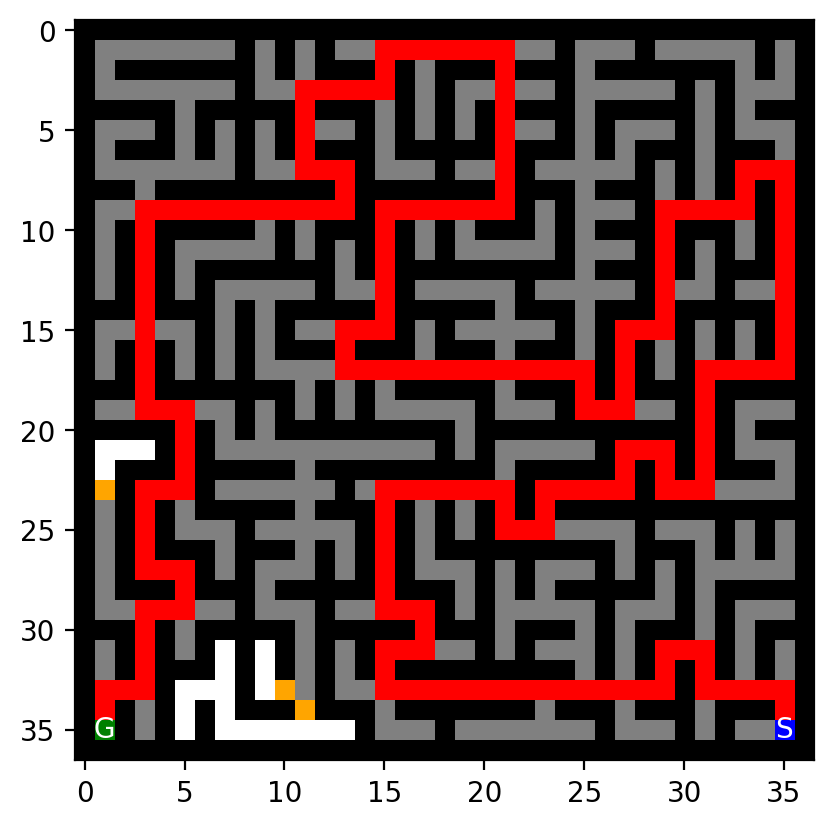

In [13]:
with open("large_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 683
Max frontier: 25
Max tree: 55
Nodes in memory: 684
Node - pos = (21, 1); action = W; cost = 55; hn = 1000000


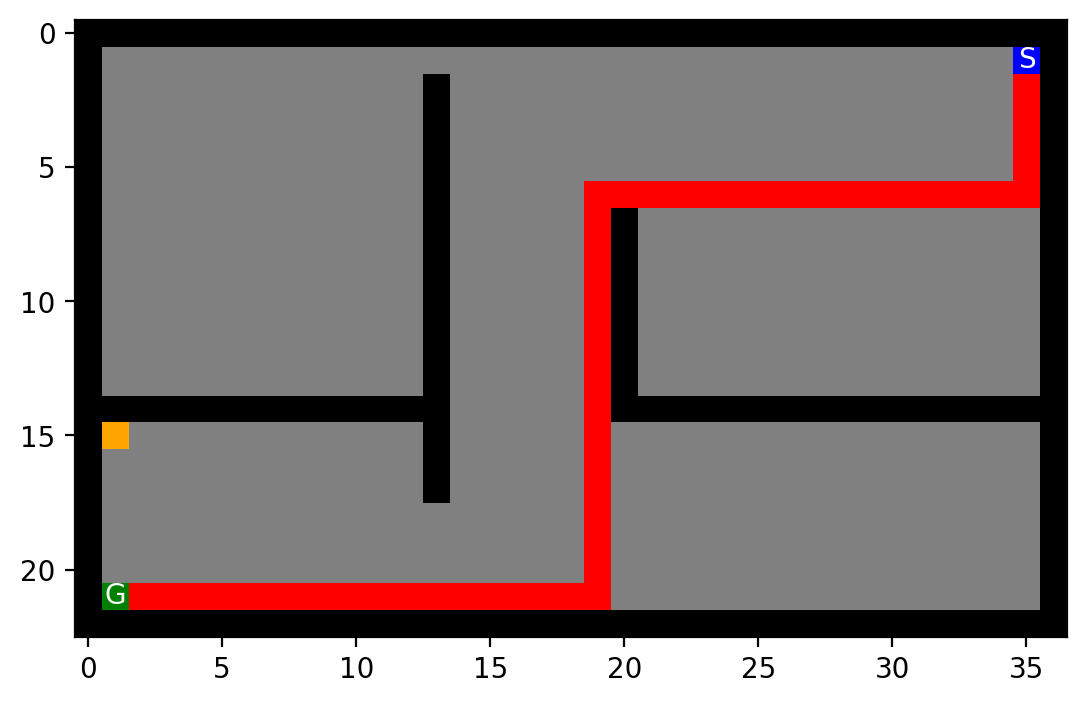

In [14]:
with open("open_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 90
Max frontier: 11
Max tree: 15
Nodes in memory: 91
Node - pos = (2, 9); action = E; cost = 15; hn = 1000000


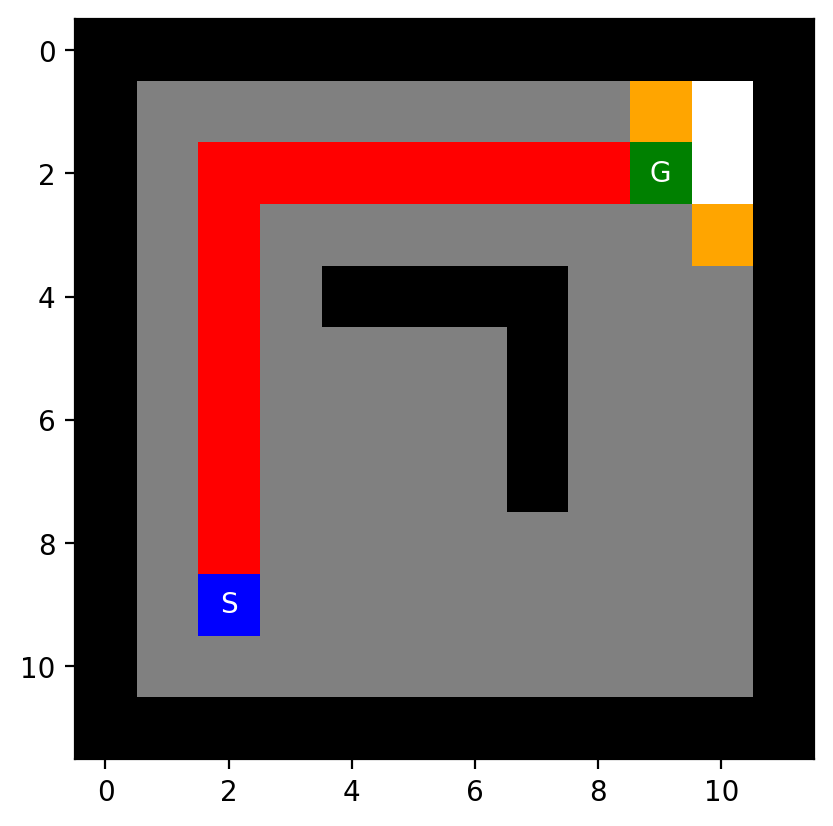

In [15]:
with open("wall_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 71
Max frontier: 8
Max tree: 24
Nodes in memory: 72
Node - pos = (1, 1); action = W; cost = 24; hn = 1000000


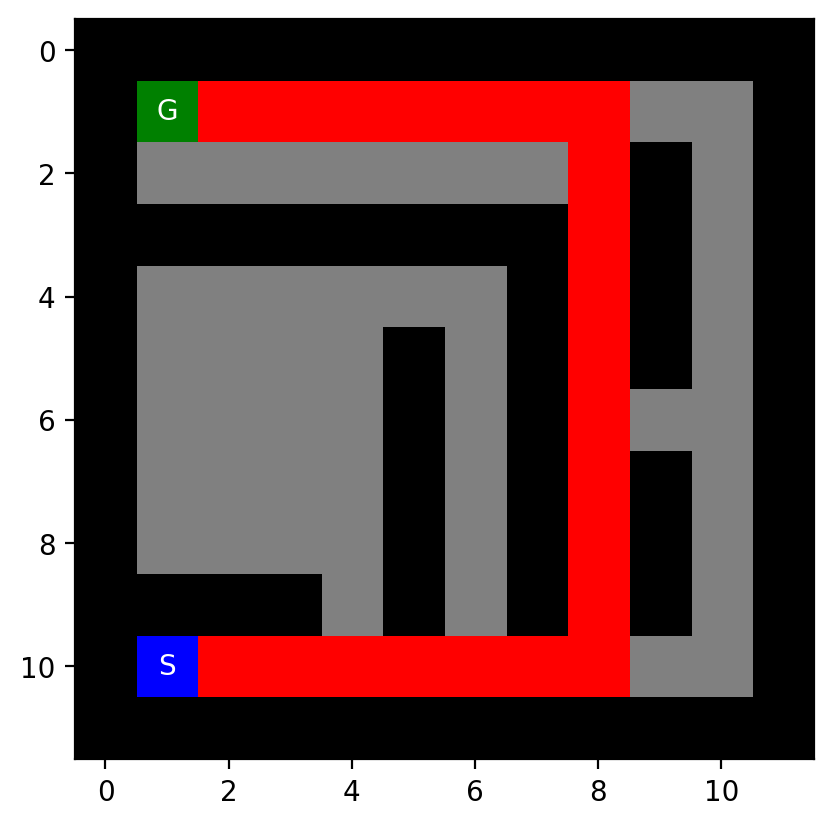

In [16]:
with open("loops_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 97
Max frontier: 12
Max tree: 15
Nodes in memory: 98
Node - pos = (2, 9); action = E; cost = 15; hn = 1000000


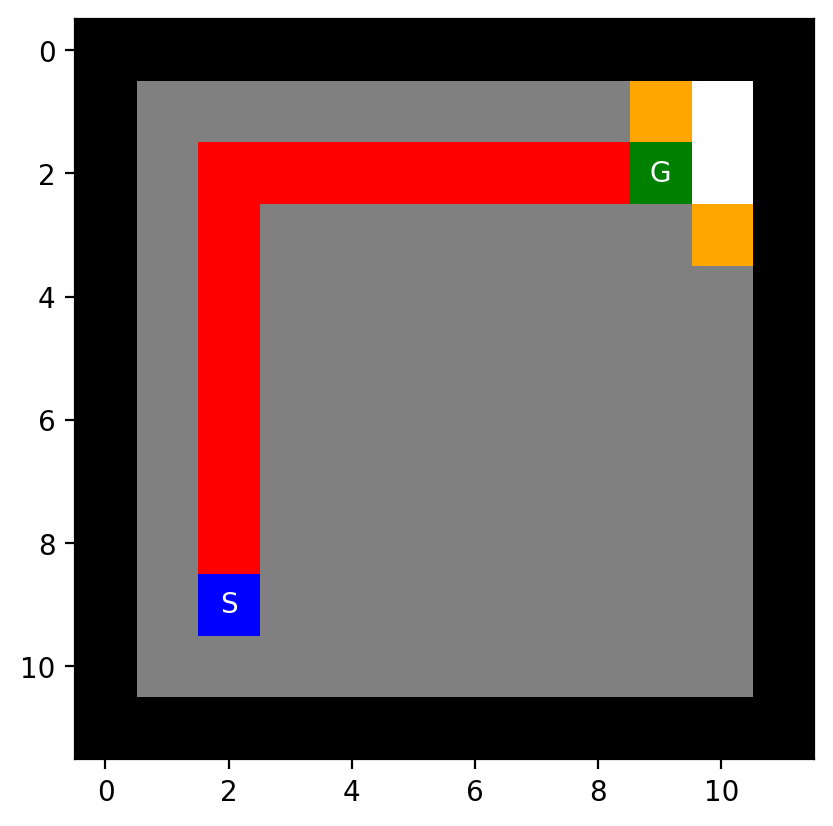

In [17]:
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 97
Max frontier: 11
Max tree: 15
Nodes in memory: 98
Node - pos = (9, 2); action = W; cost = 15; hn = 1000000


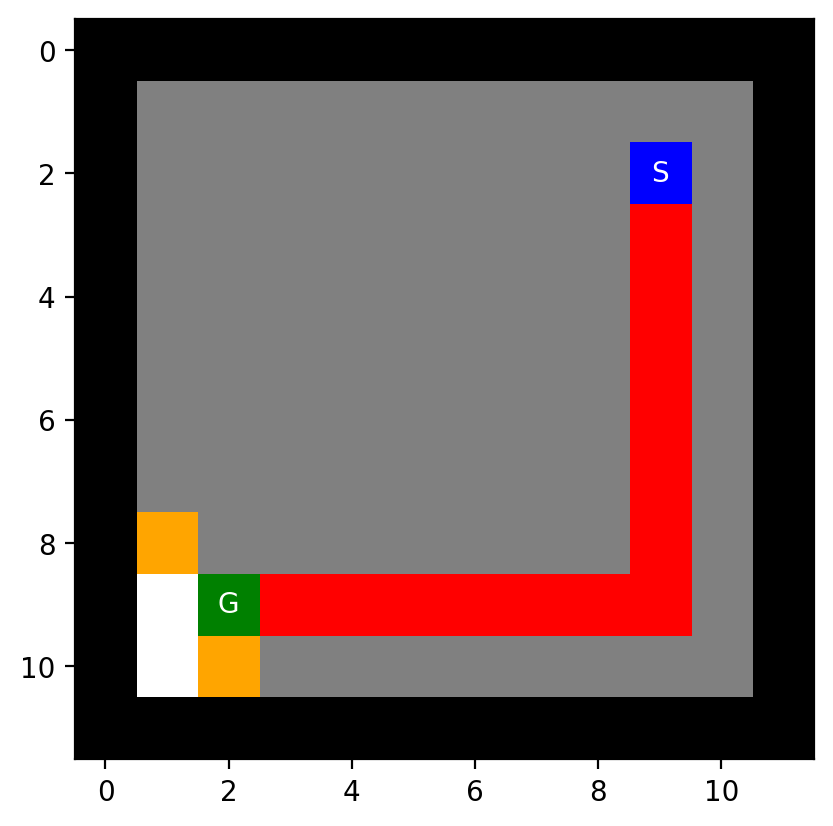

In [18]:
with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

# DFS

In [19]:

import maze_helper as mh
import random

def DFS(currentNode, maze):
    frontier = []
    count = 0
    mazes = []
    nodes = {}
    cost = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0

    frontier.append(currentNode)
    name = f'node{currentNode.pos}'
    nodes[name] = currentNode
    mazes.append(maze)

    #This time, I set a maximum count to interrupt infinite loops
    while len(frontier) > 0 and count < 10000:
        count += 1 
        maze = np.copy(maze)
        mazes.append(maze)

        #Checking the length of the frontier, if max, setting frontiermax as the maximum frontier length
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)

        #Setting valid nodes in frontier as a frontier space on the map (for debugging)
        for node in frontier:
            x,y = node.pos
            if maze[x][y] != 'G' and maze[x][y] != 'S':
                maze[x][y] = 'F'

        #Popping the current node from the end of list in last in first out order for DFS
        currentNode = frontier.pop()
        currentPos = currentNode.pos

        #Getting length of the tree for each node and if max, setting max tree as the maximum length  
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount

        #Setting the explored nodes as grey (without using a reached structure)
        # ***The algorithm doesn't take the '.' into account when deciding potential children
        #Meaning, the algorithm will still consider grey '.' nodes as potential children
        #This is PURELY for visualization and debugging, again, I am not using any type of reached structure
        #We will LATER only use the get_path_from_root() to cycle check in the algorithm so that we are following the guidelines of the assignment
        for node in currentNode.get_path_from_root():
            x,y = node.pos
            if node not in frontier and maze[x][y] != 'G' and maze[x][y] != 'S':
                maze[x][y] = '.'

        #Checking to see if the current node is the goal, and if so, changing the path color, appending the maze, and returning the values
        x,y = currentPos
        if maze[x][y] == 'G':
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze)
            print('Goal found!')
            return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree

        #Still considers '.' as potential children, giving us the need to cycle check with get_path_from_root()
        #Checking if north direction is valid
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) != 'X':
            childPos = (currentPos[0]-1, currentPos[1])
            #Cycle checking- seeing if child node is in path from root 
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'N', cost)
                #Calculating cost for the node
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                #Appending the frontier and incrementing nodes expanded, if the node was added to frontier
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) != 'X':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'E', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) != 'X':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'S', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) != 'X':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'W', cost)

                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost

                frontier.append(nodes[name])
                nodesexpanded += 1

    return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree
            

Goal found!
Number of nodes expanded: 43
Max frontier: 5
Max tree: 30
Nodes in memory: 44
Node - pos = (8, 1); action = W; cost = 30; hn = 1000000


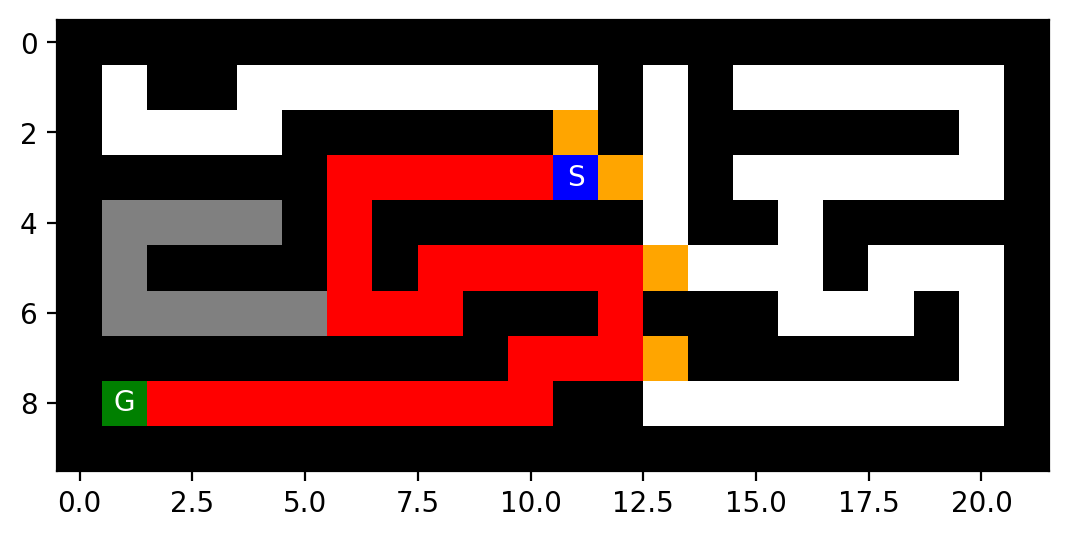

In [20]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])


Goal found!
Number of nodes expanded: 160
Max frontier: 8
Max tree: 153
Nodes in memory: 161
Node - pos = (16, 1); action = W; cost = 153; hn = 1000000


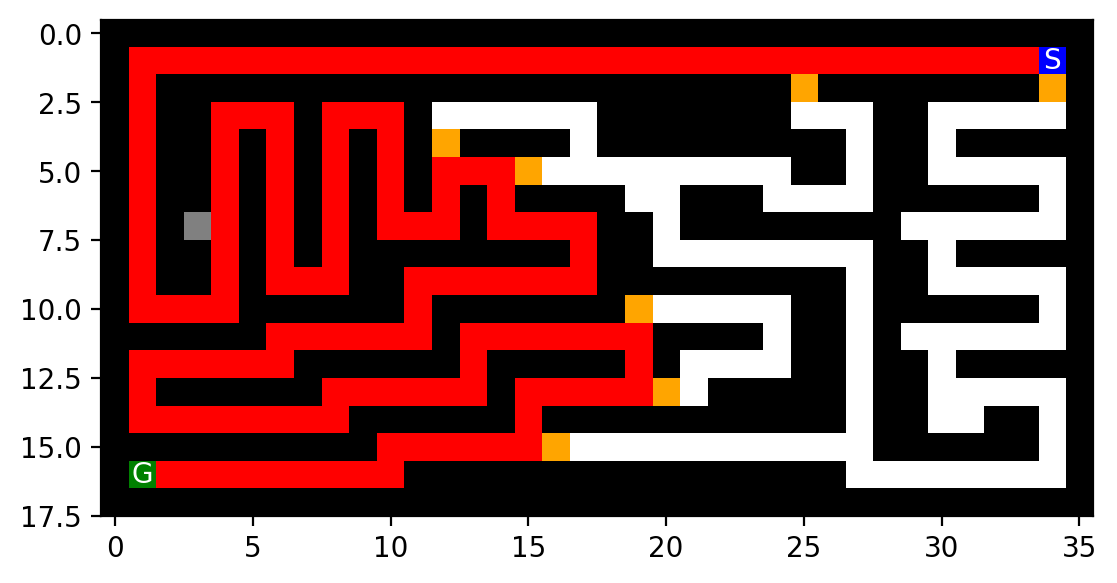

In [21]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 374
Max frontier: 38
Max tree: 215
Nodes in memory: 375
Node - pos = (35, 1); action = S; cost = 211; hn = 1000000


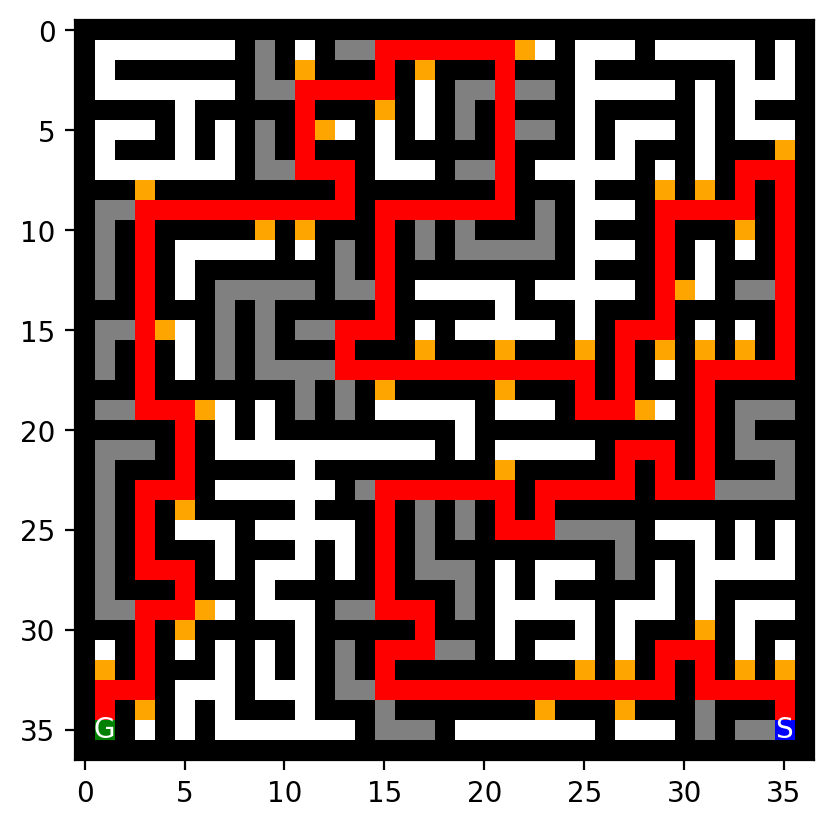

In [22]:
with open("large_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Number of nodes expanded: 10145
Max frontier: 155
Max tree: 179
Nodes in memory: 201
Node - pos = (2, 8); action = N; cost = 167; hn = 1000000


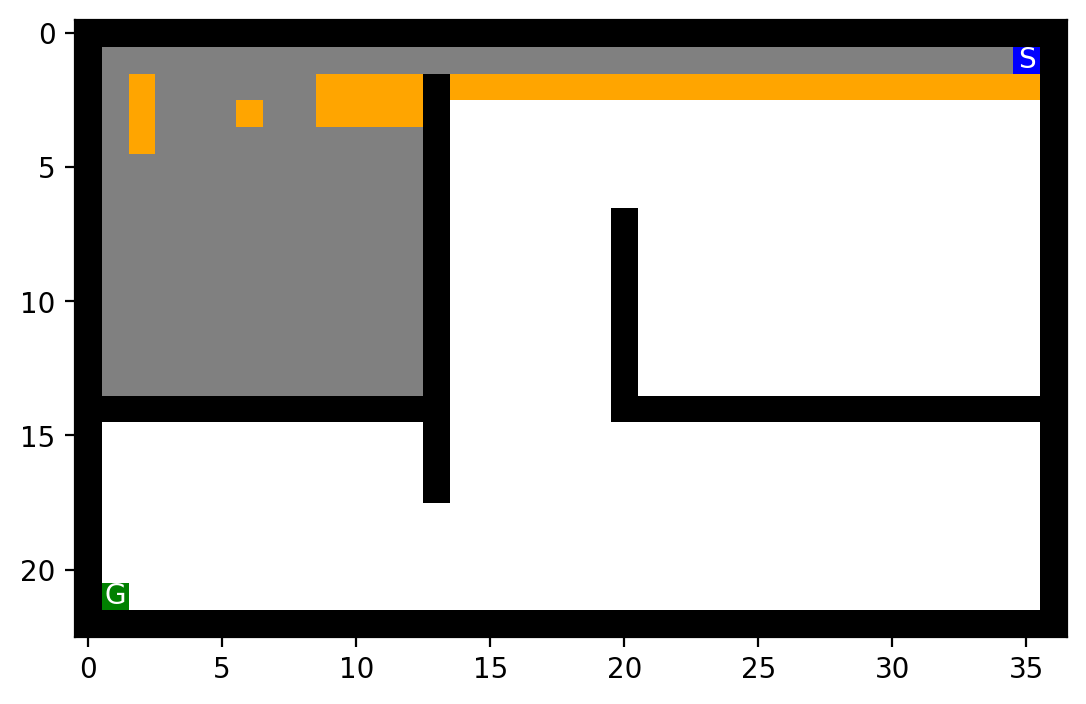

In [23]:
with open("open_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

The place where the infinite loop occurred can clearly be seen on the left concave part of the maze. The yellow frontier was the group of nodes that kept being added to the frontier, cycle checked, removed, and added again.

Goal found!
Number of nodes expanded: 1194
Max frontier: 59
Max tree: 73
Nodes in memory: 91
Node - pos = (2, 9); action = E; cost = 65; hn = 1000000


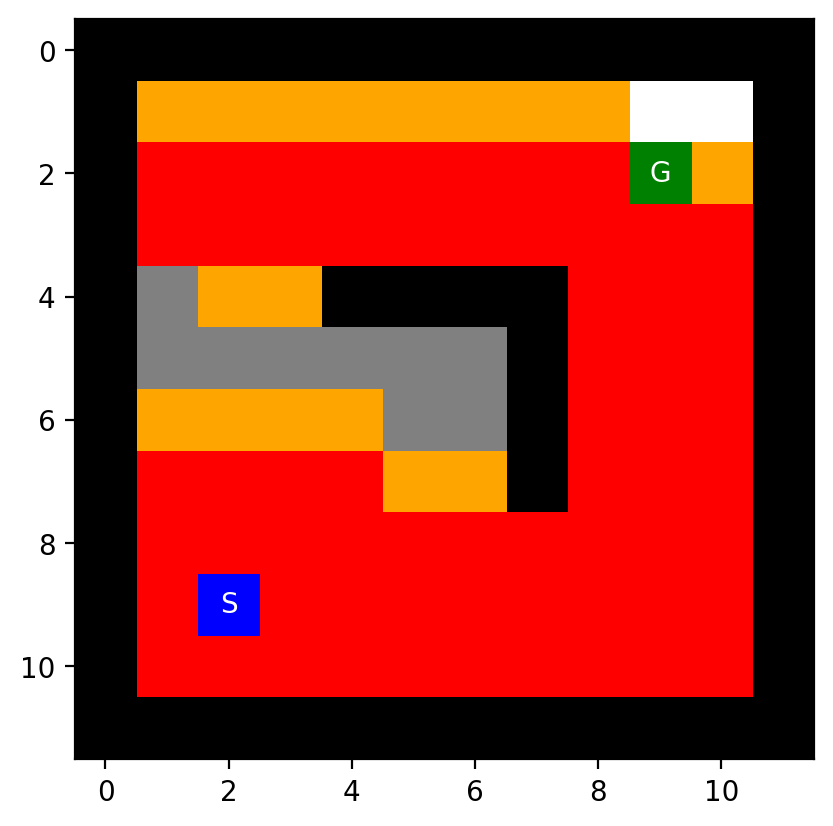

In [24]:
with open("wall_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 41
Max frontier: 12
Max tree: 28
Nodes in memory: 41
Node - pos = (1, 1); action = N; cost = 28; hn = 1000000


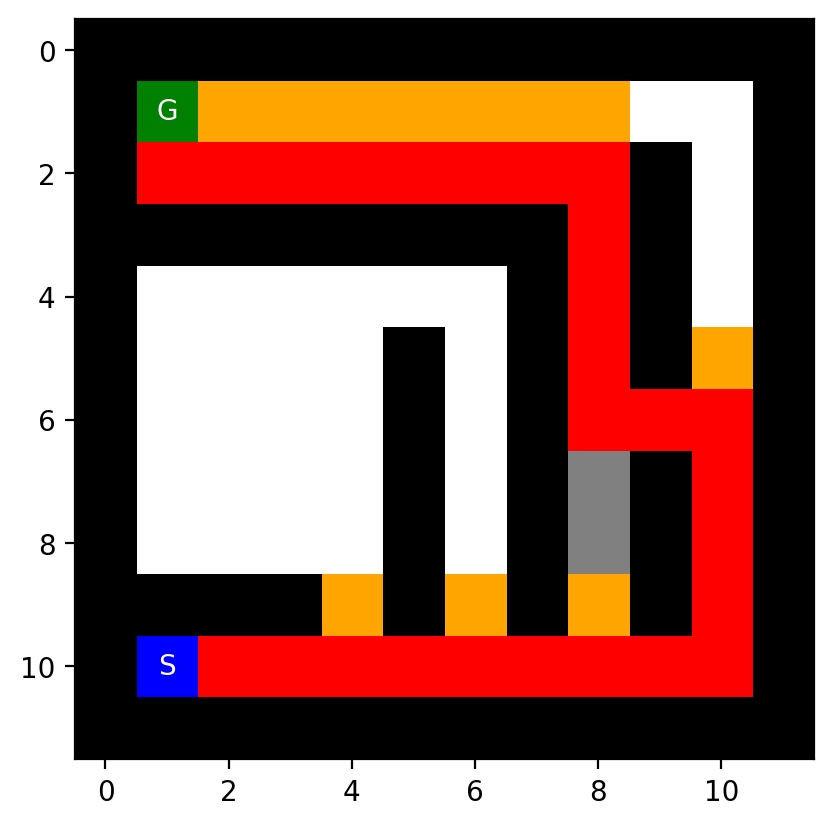

In [25]:
with open("loops_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 152
Max frontier: 73
Max tree: 81
Nodes in memory: 90
Node - pos = (2, 9); action = N; cost = 81; hn = 1000000


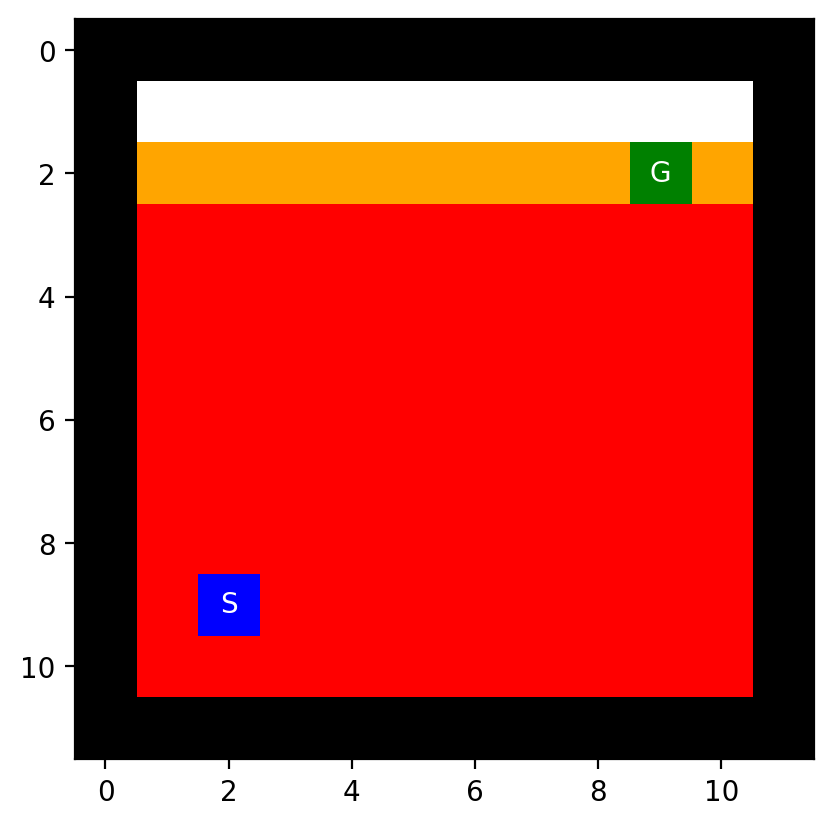

In [26]:
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 75
Max frontier: 42
Max tree: 35
Nodes in memory: 66
Node - pos = (9, 2); action = W; cost = 35; hn = 1000000


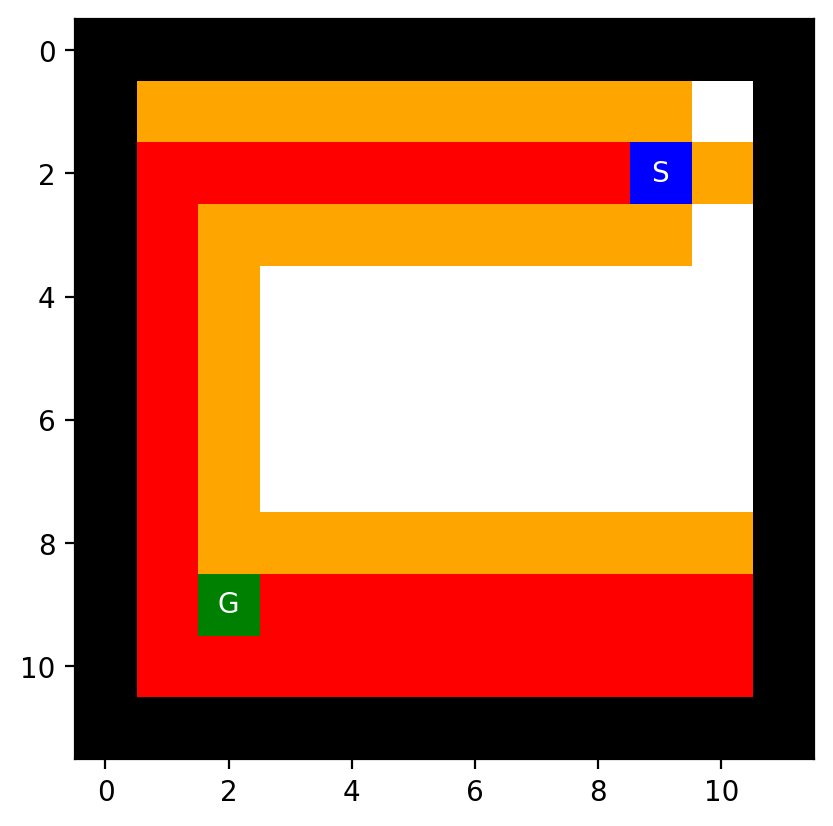

In [27]:
with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

How does BFS and DFS deal with loops (cycles)?

BFS deals with cycles by simply checking the reached data structure before appending a node to the frontier. In so doing, the algorithm avoids cycles by never even putting them in the frontier list. DFS, on the other hand, needs a cycle chekcing technique. To accomplish this, I checked each valid child node to see if it was in the nodes path from the root, and if it was, not appending the frontier with the node. By doing this, the agent is able to figure out that the node was already searched, and will move on (ideally) to nodes that haven't been searched yet. In the open maze, however, this method failed. The DFS agent would find itself appending nodes that it explored but weren't in its current path. Then it would keep searching, find a node that was in its current path, restart, and repeat over and over again. I tried even doing random restarts, but this did not work so I cut my losses and moved on. The area where this occurred can clearly be seen as the yellow frontier on the left side of the open maze in the middle of the large, enclosed zone.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

The BFS algorithm is both complete and optimal. The BFS theoretically can try every single possibility and it always found the lowest cost solution in existence. The DFS is not considered complete, as it can theoretically infinitely search a space. In fact, my DFS did get stuck in an infinite loop. Furthermore, the DFS solutions are not optimal. In almost every DFS solution, there existed a better solution that was not found. The time and space complexity of my BFS implementation are both O(B^d) where B is the maximum branching factor and d is the depth of the optimal solution. This is because every possible child of every node is considered in my algorithm until the solution is found, which could be O(B^d) in the worst case scenario. The time complexity of my DFS is O(B^m) where B is the maxmimum branching factor and m is the maximum depth of the tree. This is because every node is potentially considered until a solution is found, even if it is not the optimal solution. In a worst case scenario, this 'solution' could be the furthest space from the start, making the time complixty O(B^m) instead of O(B^d). The space complexity of my algorithm is O(Bm) as we are not using a reached data structure, and consequently we are not storing nodes in a O(B^d) size.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [78]:
import maze_helper as mh

def GBFS(startNode, maze):
    #Initializing variables that are described above 
    frontier = []
    reached = []
    mazes = []
    nodes = {}
    cost = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0

    #Appending the mazes, nodes,reached, and frontier with the starting node
    frontier.append(startNode)
    reached.append(startNode.pos)
    name = f'node{startNode.pos}'
    nodes[name] = startNode
    mazes.append(maze)

    #While the frontier is not empty
    while len(frontier) > 0:
        maze = np.copy(maze)
        mazes.append(maze)
        
        #Finding max length of frontier
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)

        #Visualizing reached and frontier nodes on the animation for debugging
        for x,y in reached:
            if (x,y) != mh.find_pos(maze, what='G') and (x,y) != mh.find_pos(maze, what= 'S'):
                maze[x][y] = '.'
        for node in frontier:
            if node.pos != mh.find_pos(maze, what='G') and node.pos != mh.find_pos(maze, what= 'S'):
                x,y = node.pos
                maze[x][y] = 'F'

        #This is the list of heuristic values for each node in the frontier that we will use later
        #For Greedy best first search, the heuristic will simply be manhattan distance from the goal node
        heuristics = [x.hn for x in frontier]

        #Enumerating the index and heuristics
        for index, h in enumerate(heuristics):
            #If the heuristic is the minimum one in the frontier, set that as the current node using the index
            if h == min(heuristics):
                currentNode = frontier.pop(index)
                break

        #Getting the current node position
        currentPos = currentNode.pos

        #Getting maximum tree count
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount
        
        #We will calculate cost here using the path back to the root from the current node
        

        #If the current node is the goal, adjust the animation and return all the desired variables
        if currentPos == mh.find_pos(maze, what='G'):
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze) 
            print('Goal found!')  
            return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree
        
        #If north is valid,
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]-1, currentPos[1])) == 'G':
            childPos = (currentPos[0]-1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'

                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                #Defining the heursitic as the sum between the difference in abs value of x and y coordinates
                hn = abs(i-x) + abs(j-y)
                #Adding new node to the dictionary of nodes
                nodes[name] = Node(childPos, currentNode, 'N', cost, hn)
                #Adjusting cost
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                #Adding node to the frontier
                frontier.append(nodes[name])
                reached.append(childPos)
                #Incrementing nodes expanded
                nodesexpanded += 1

        #Same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]+1)) == 'G':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                hn = abs(i-x) + abs(j-y)
                nodes[name] = Node(childPos, currentNode, 'E', cost, hn)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

        #Same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]+1, currentPos[1])) == 'G':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                hn = abs(i-x) + abs(j-y)
                nodes[name] = Node(childPos, currentNode, 'S', cost, hn)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

        #Same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]-1)) == 'G':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                hn = abs(i-x) + abs(j-y)
                nodes[name] = Node(childPos, currentNode, 'W', cost, hn)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

    


Goal found!
Number of nodes expanded: 43
Max frontier: 5
Max tree: 30
Nodes in memory: 44
Node - pos = (8, 1); action = W; cost = 30; hn = 0


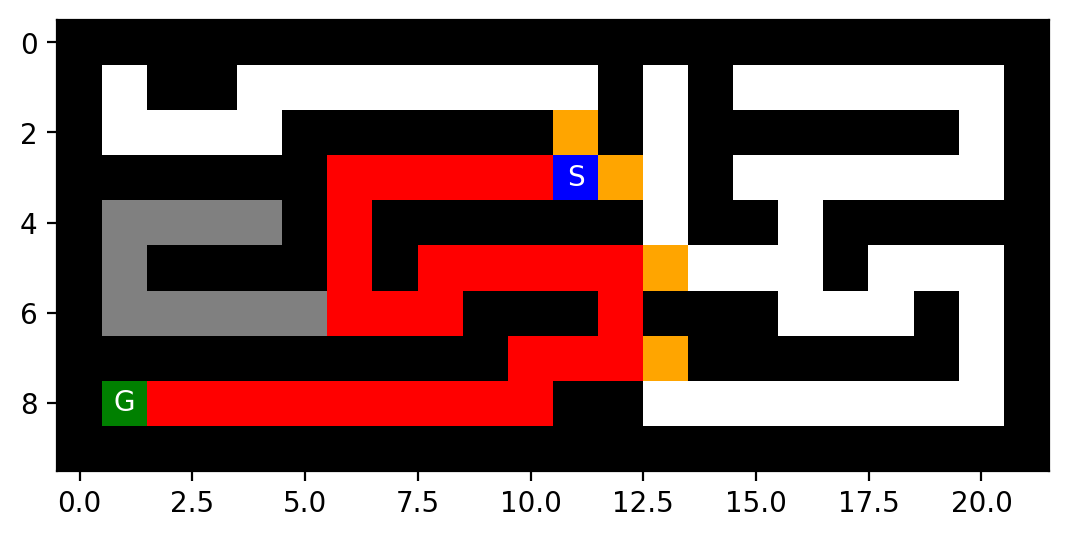

In [79]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 81
Max frontier: 4
Max tree: 75
Nodes in memory: 82
Node - pos = (16, 1); action = W; cost = 75; hn = 0


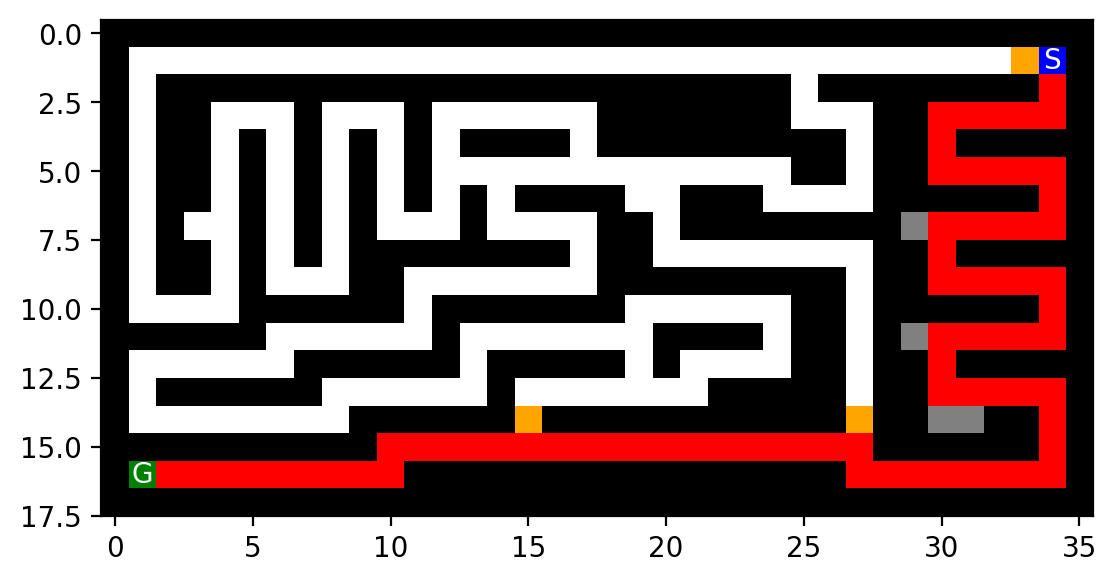

In [80]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 486
Max frontier: 21
Max tree: 211
Nodes in memory: 487
Node - pos = (35, 1); action = S; cost = 211; hn = 0


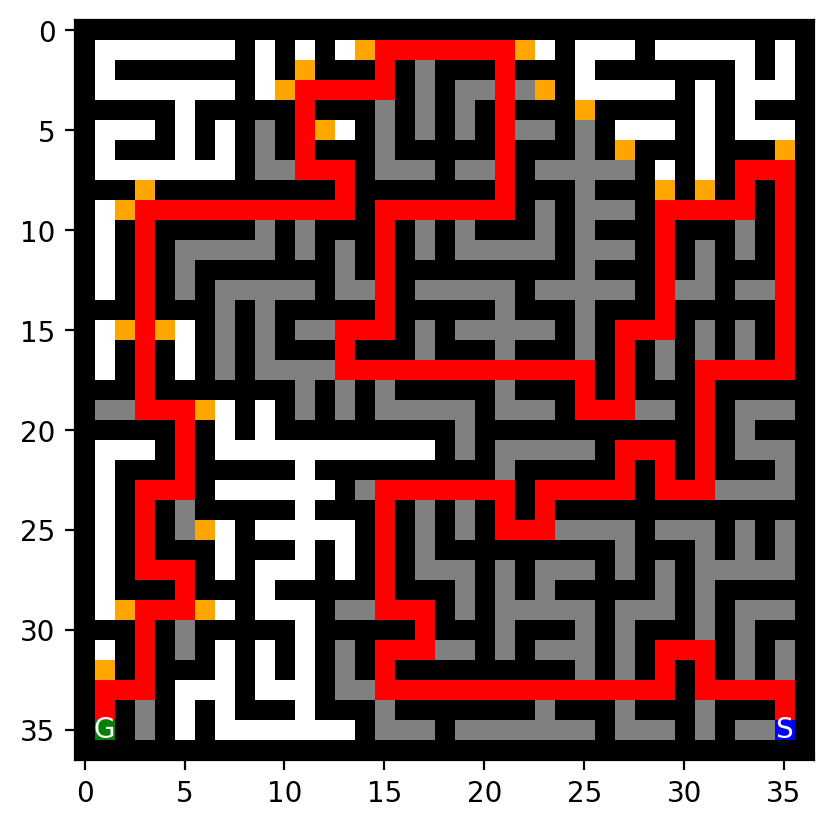

In [81]:
with open("large_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 154
Max frontier: 66
Max tree: 69
Nodes in memory: 155
Node - pos = (21, 1); action = W; cost = 69; hn = 0


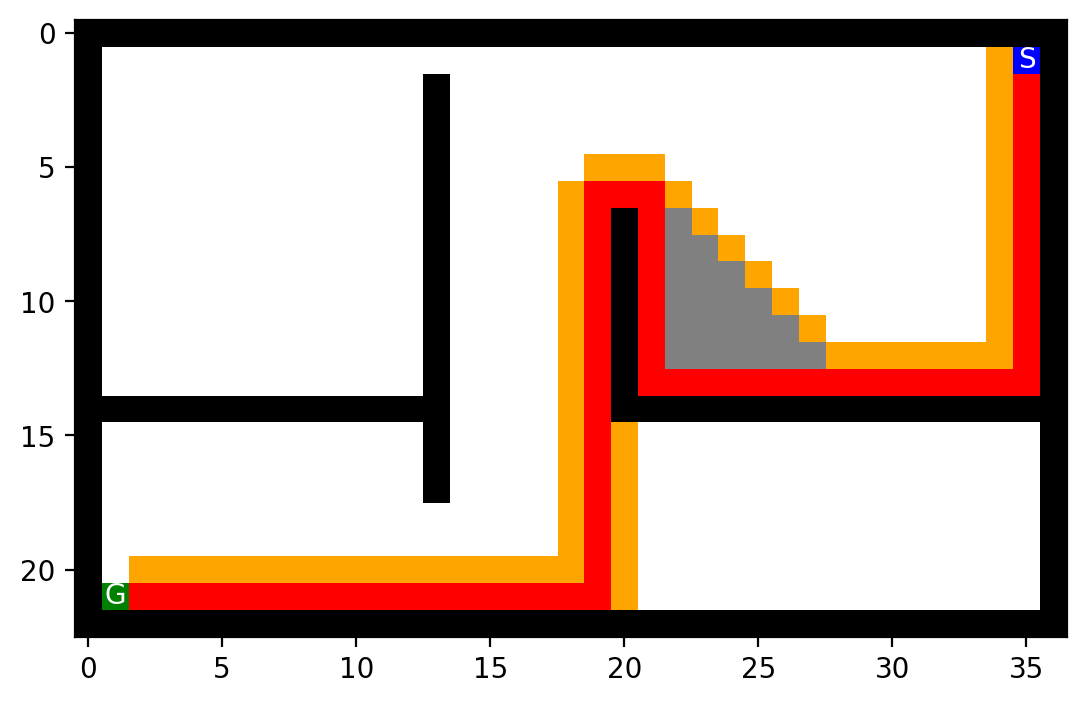

In [82]:
with open("open_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 42
Max frontier: 29
Max tree: 15
Nodes in memory: 43
Node - pos = (2, 9); action = E; cost = 15; hn = 0


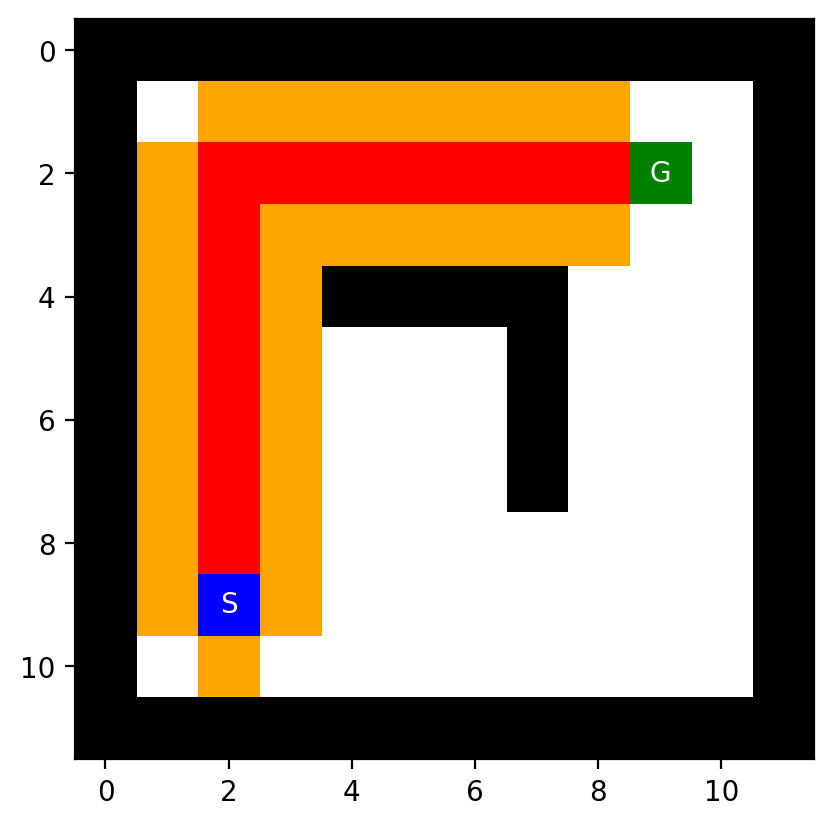

In [83]:
with open("wall_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 60
Max frontier: 10
Max tree: 24
Nodes in memory: 61
Node - pos = (1, 1); action = W; cost = 24; hn = 0


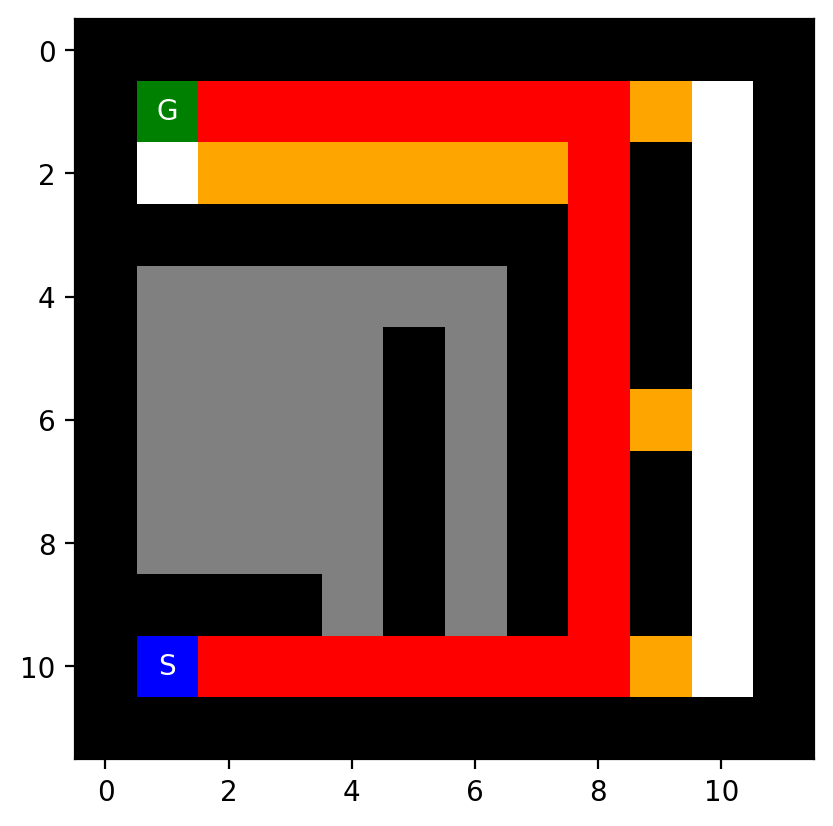

In [84]:
with open("loops_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 42
Max frontier: 29
Max tree: 15
Nodes in memory: 43
Node - pos = (2, 9); action = E; cost = 15; hn = 0


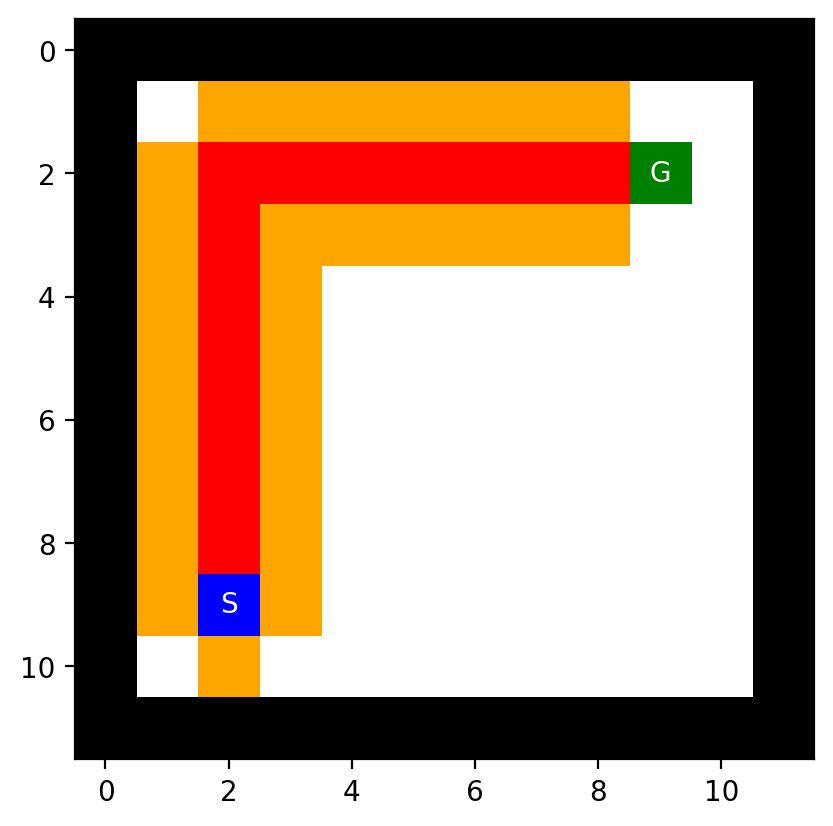

In [85]:
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 42
Max frontier: 29
Max tree: 15
Nodes in memory: 43
Node - pos = (9, 2); action = W; cost = 15; hn = 0


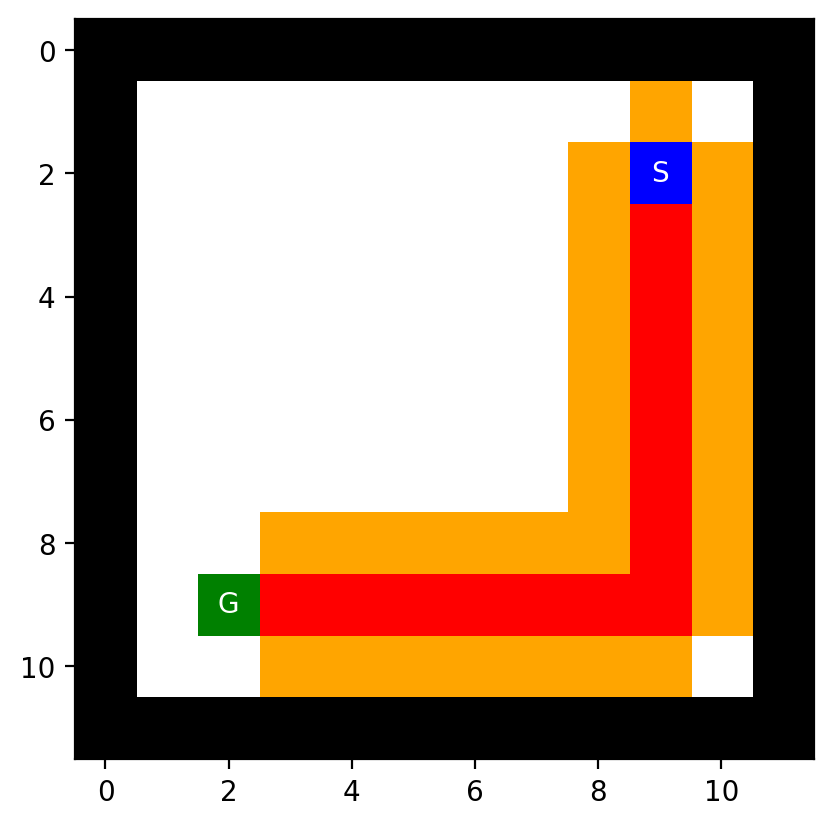

In [86]:
with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = GBFS(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

In [87]:
import maze_helper as mh

def Astar(startNode, maze):
    #Declaring all variables
    frontier = []
    reached = []
    mazes = []
    nodes = {}
    cost = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0

    #Appending node dictionary, maze, frontier, and reached with node 
    frontier.append(startNode)
    reached.append(startNode.pos)
    name = f'node{startNode.pos}'
    nodes[name] = startNode
    mazes.append(maze)

    #While frontier not empty
    while len(frontier) > 0:
        #Appending list of mazes simply for visualization and debugging
        maze = np.copy(maze)
        mazes.append(maze)
        
        #Setting max length of frontier
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)

        #Adjusting the visualizations of frontier and reached for debugging
        for x,y in reached:
            if (x,y) != mh.find_pos(maze, what='G') and (x,y) != mh.find_pos(maze, what= 'S'):
                maze[x][y] = '.'
        for node in frontier:
            if node.pos != mh.find_pos(maze, what='G') and node.pos != mh.find_pos(maze, what= 'S'):
                x,y = node.pos
                maze[x][y] = 'F'
        #Creating a heursitic that combines its cost (gn) and its manhattan distance from the goal (hn)
        for node in frontier:
            node.star = node.cost + node.hn 
        
        #Creating list of heuristics we will use to find the minimum
        stars = [x.star for x in frontier]

        #Finding node with lowest heuristic in frontier
        for index, s in enumerate(stars):
            #Finding minimum heuristic of all nodes in the frontier and setting that is the current node
            if s == min(stars):
                currentNode = frontier.pop(index)
                break

        currentPos = currentNode.pos

        #Getting maximum tree length 
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount
        
        #If currentNode is goal, adjusting visualization for debugging and returning all the variables
        if currentPos == mh.find_pos(maze, what='G'):
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze) 
            print('Goal found!')  
            return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree
        
        #Checking if north is valid
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]-1, currentPos[1])) == 'G':
            childPos = (currentPos[0]-1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos

                #Setting the manhattan distance as the abs value of the difference in the x and y coordinates
                hn = abs(i-x) + abs(j-y)

                #Creating the node and appending it to the dictionary 
                nodes[name] = Node(childPos, currentNode, 'N', cost, hn)

                #Setting the nodes cost
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                
                #Appending the frontier with the new child node
                frontier.append(nodes[name])
                reached.append(childPos)
                #incrementing the nodes expanded value
                nodesexpanded += 1

        #Doing the same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]+1)) == 'G':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                hn = abs(i-x) + abs(j-y)
                nodes[name] = Node(childPos, currentNode, 'E', cost, hn)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

        #Doing all the same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]+1, currentPos[1])) == 'G':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                hn = abs(i-x) + abs(j-y)
                nodes[name] = Node(childPos, currentNode, 'S', cost, hn)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

        #Doing all the same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]-1)) == 'G':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in reached:
                name = f'node{childPos}'
                x,y = mh.find_pos(maze, what = 'G')
                i,j = childPos
                hn = abs(i-x) + abs(j-y)
                nodes[name] = Node(childPos, currentNode, 'W', cost, hn)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

    


Goal found!
Number of nodes expanded: 58
Max frontier: 8
Max tree: 20
Nodes in memory: 59
Node - pos = (8, 1); action = W; cost = 20; hn = 0


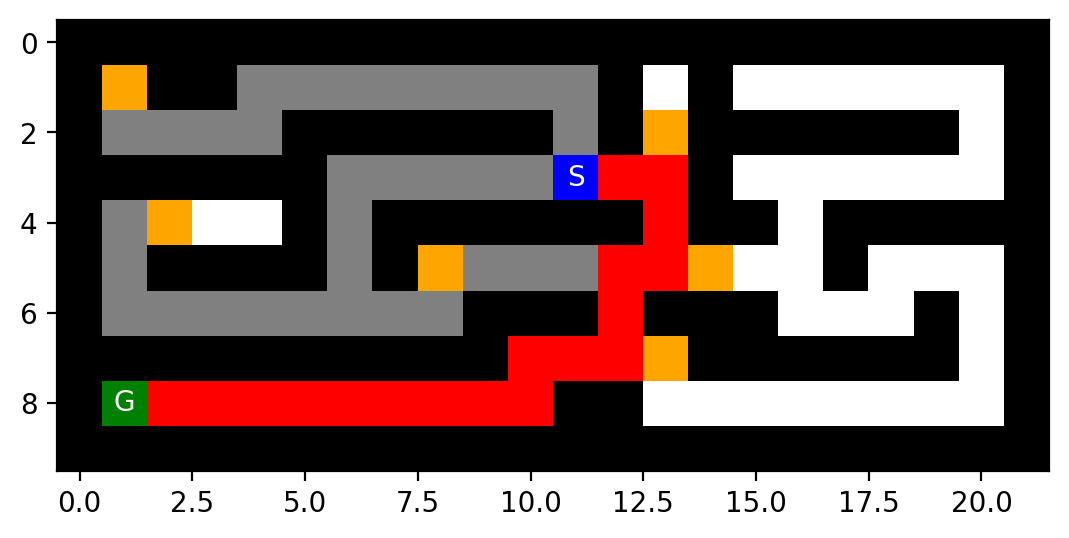

In [77]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 227
Max frontier: 8
Max tree: 69
Nodes in memory: 228
Node - pos = (16, 1); action = W; cost = 69; hn = 0


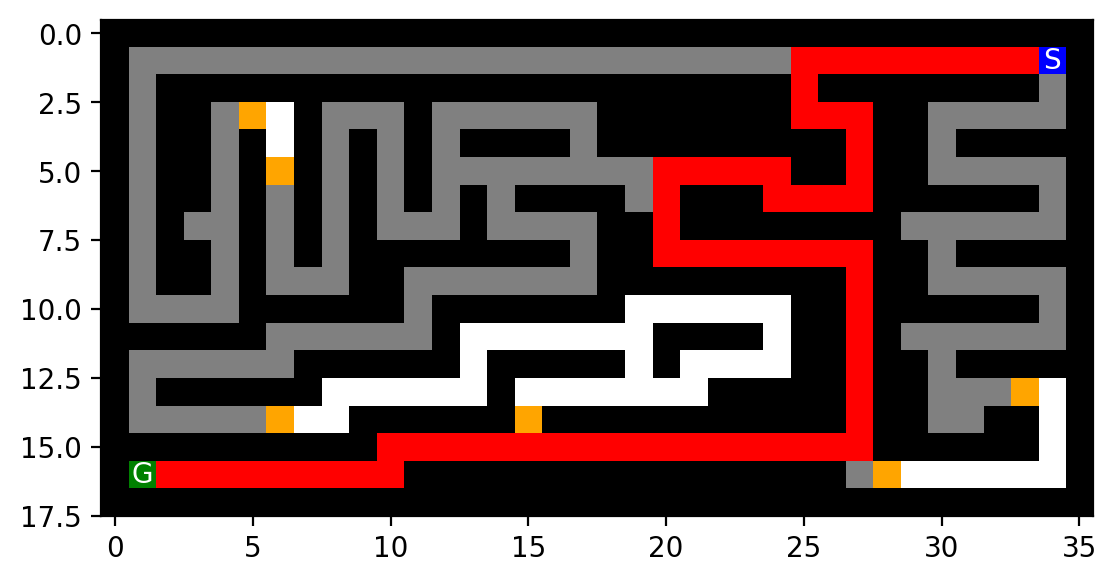

In [41]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 556
Max frontier: 12
Max tree: 211
Nodes in memory: 557
Node - pos = (35, 1); action = S; cost = 211; hn = 0


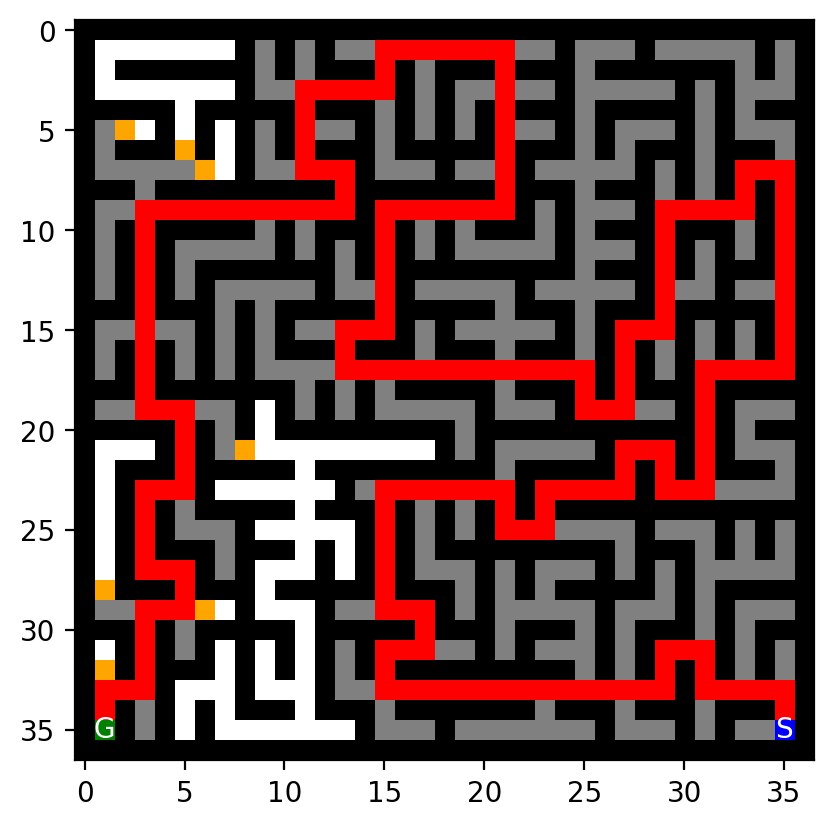

In [42]:
with open("large_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 554
Max frontier: 25
Max tree: 55
Nodes in memory: 555
Node - pos = (21, 1); action = W; cost = 55; hn = 0


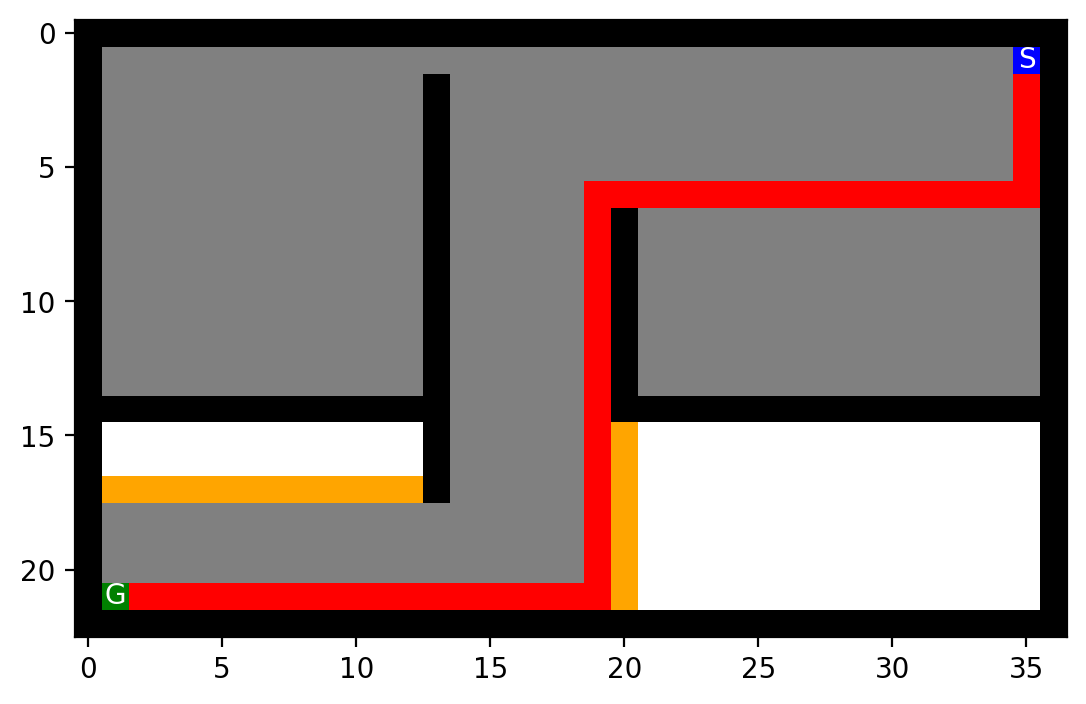

In [43]:
with open("open_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 86
Max frontier: 31
Max tree: 15
Nodes in memory: 87
Node - pos = (2, 9); action = E; cost = 15; hn = 0


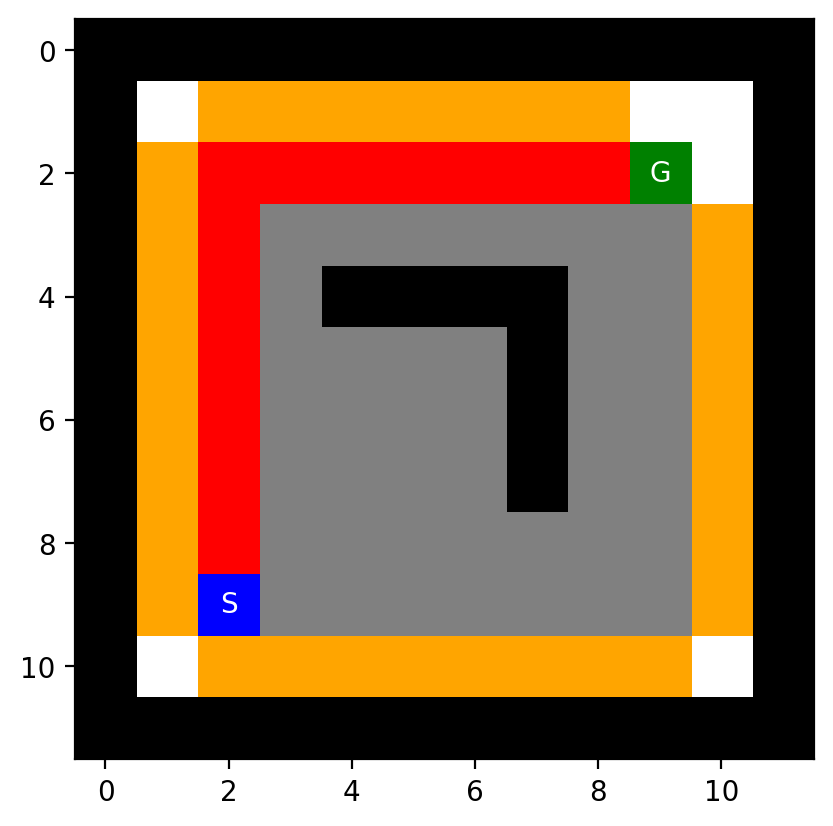

In [44]:
with open("wall_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 61
Max frontier: 6
Max tree: 24
Nodes in memory: 62
Node - pos = (1, 1); action = W; cost = 24; hn = 0


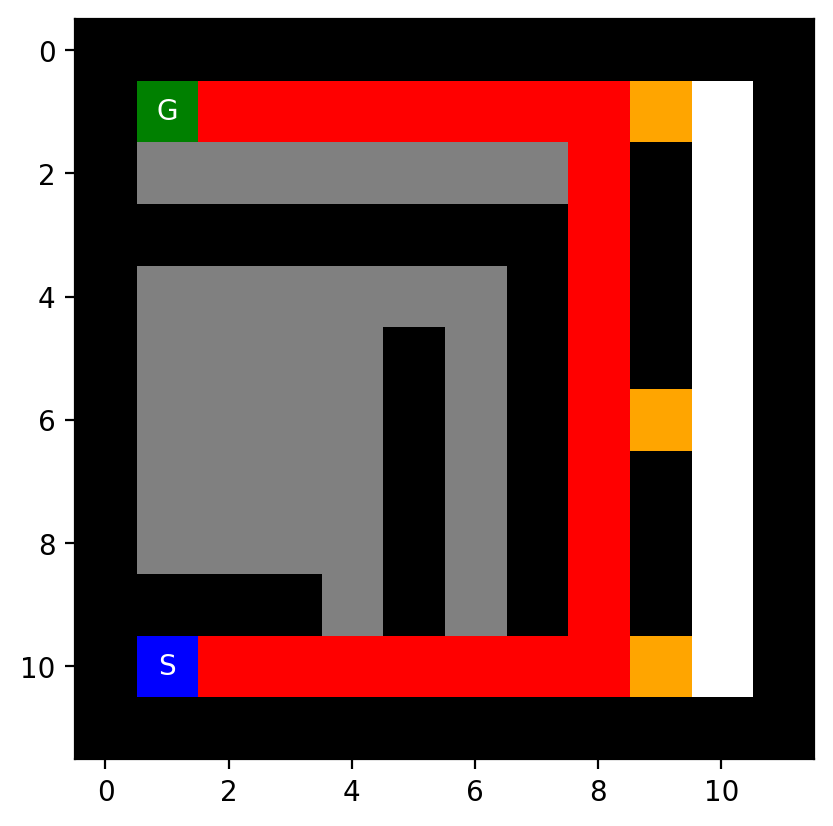

In [45]:
with open("loops_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 93
Max frontier: 31
Max tree: 15
Nodes in memory: 94
Node - pos = (2, 9); action = E; cost = 15; hn = 0


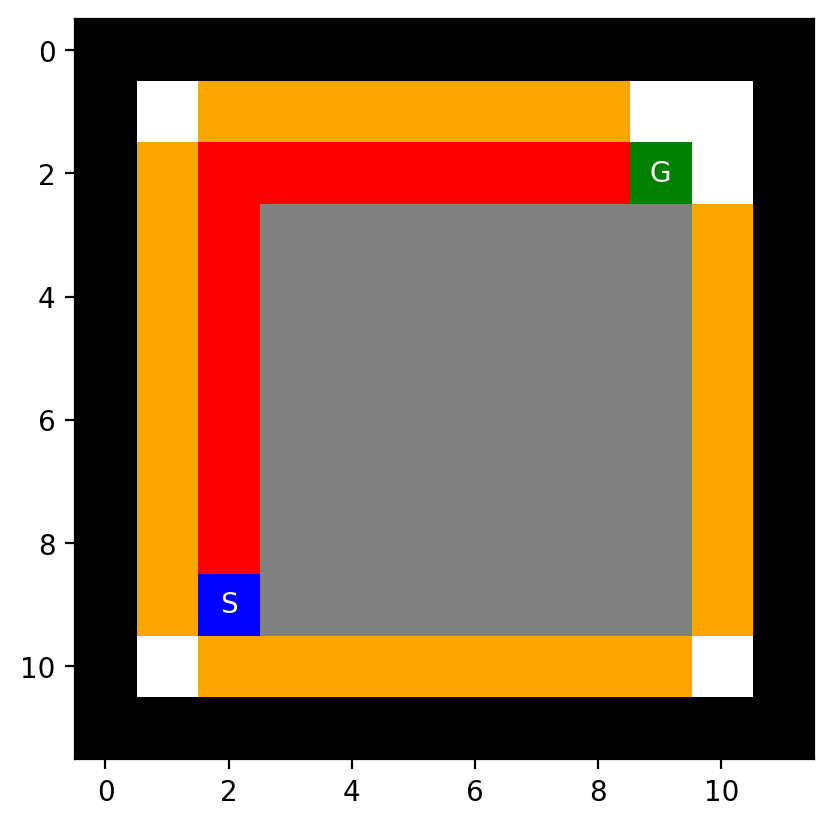

In [46]:
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Goal found!
Number of nodes expanded: 93
Max frontier: 31
Max tree: 15
Nodes in memory: 94
Node - pos = (9, 2); action = W; cost = 15; hn = 0


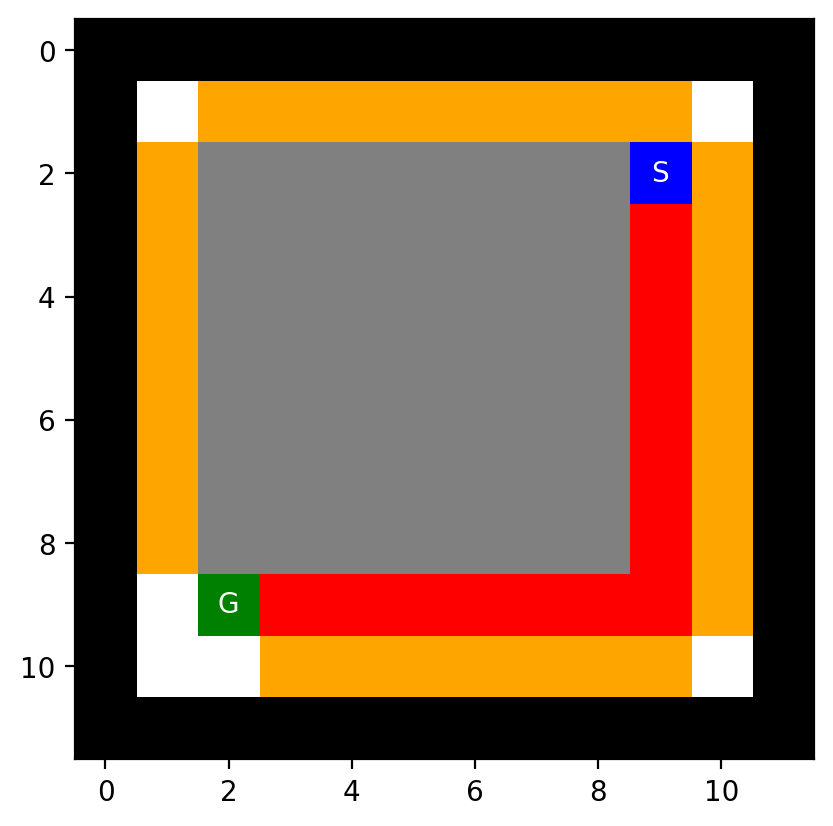

In [47]:
with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, mazes, nodes, nodesexpanded, maxfrontier, maxtree = Astar(node1, maze)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(result)
mh.show_maze(mazes[-1])

Are your implementations complete and optimal? What is the time and space complexity?

My GBFS is complete in finit spaces like the walled mazes. It would never find itself in an infinite loop in these settings, and can consider every possibility. In infinite spaces, it is not complete. It can lead to infinite loops. It is also not optimal, proven by the fact that it did not find the most optimal solutions for several mazes, like the open maze, small maze, and medium maze for example. There were other solutions for each of those that costed less. ASTAR was both complete and optimal. ASTAR would not lead to infinite loops, can search every possibility, and find the most optimal solution guaranteed. It is consequently complete, and all of our solutions were optimal. In fact, they were exactly the same as the BFS solutions because they were all optimal. There were not any other solutions taht would have led to a shorter path. The time and space complexity of my GBFS algorithm is O(b^m) in the worst case, where b is the maximum branching factor and m is the maximum depth. This is because my algorithm can potentially search the entire space and not find the optimal solution. In the worst case, it explores the entire space and its final path is the solution it comes up with. In a best case scenario, it would be O(bm) where it imeediately finds the solution. For both of these, the space complexity would be the same as it either is storing O(b^m) nodes in the worst case and O(bm) nodes in the best case. ASTAR's worst case time complexity is O(b^d) where b is the max branching factor and d is the depth of the optimal solution. This is because it may search the entire space, but is guaranteed to find the optimal solution. The time complexity is the same. 

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

Experiments were run in the implementation of the algorithms with the search mazes. I successfully animated every maze, but didn't include the animations in this submission. Rather, I only printed the final maze visualization produced. I also returned and printed all the values for these tables below each maze.

Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    20     |    93          |         20     |         94    |       9           |
| DFS       |   30      |        43      |     30         |       44      |           5       |
| GBS       |     30    |       43       |       30       |        44     |              5    |
| A*        |    20     |       58       |      20        |         59    |         8         |


__Medium maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    69     |    271         |      69        |         272   |         9         |
| DFS       |   153     |        160     |      153       |       161     |             8     |
| GBS       |  75       |     81         |      75        |      82       |        4          |
| A*        |    69     |     227        |       69       |      228      |            8      |

__Large maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |   211     |          624   |       211      |    625        |              8    |
| DFS       |    211    |        374     |      215       |      375      |         38        |
| GBS       |   211     |         486    |     211        |   487         |         21        |
| A*        |    211    |      556       |    211         |     557       |         12        |

__Open maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    55     |      683       |         55     |       684     |            25     |
| DFS       |      N/A  |         N/A    |         N/A    |       N/A     |          N/A      |
| GBS       |        69 |         154    |          69    |       155     |            66     |
| A*        |     55    |      554       |       55       |     555       |          25       |

__Wall maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    15     |        90      |       15       |       91      |           11      |
| DFS       |    65     |    1194        |        73      |     91        |        59         |
| GBS       |     15    |        42      |         15     |       43      |       29          |
| A*        |    15     |        86      |         15     |       87      |         31        |

__Loops maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |      24   |         71     |        24      |       72      |         8         |
| DFS       |     28    |        41      |        28      |      41       |           12      |
| GBS       |       24  |       60       |      24        |      61       |        10         |
| A*        |      24   |      61        |      24        |       62      |         6         |

__Empty maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |   15      |       97       |       15       |        98     |        12         |
| DFS       |    81     |         152    |         81     |       90      |        73         |
| GBS       |     15    |        42      |    15          |       43      |           29      |
| A*        |     15    |        93      |       15       |       94      |         31        |

__Empty 2 maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |   15      |      97        |        15      |        98     |        11         |
| DFS       |    35     |        75      |       35       |          66   |          42       |
| GBS       |     15    |        42      |      15        |     43        |        29         |
| A*        |     15    |        93      |      15        |       94      |         31        |


...

The only maze that led to an infinite loop was the DFS algorithm on the Open Maze. This is because the DFS would navigate to one of the concave sections of the maze, and even with cycle checking that checked its path from the root, would find itself in an endless cycle. This is because the agent would cycle check, pop a new node, create the new frontier, reach the node again that caused the cycle check, and repeat the process endlessly. The large open space of course caused this, as DFS performed quite well in the mazes without open spaces. The area where this occurred can clearly be seen as the yellow frontier section on the left side of the DFS open maze. For the sake of data visualization, we just removed the DFS data on the open maze.

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)). 

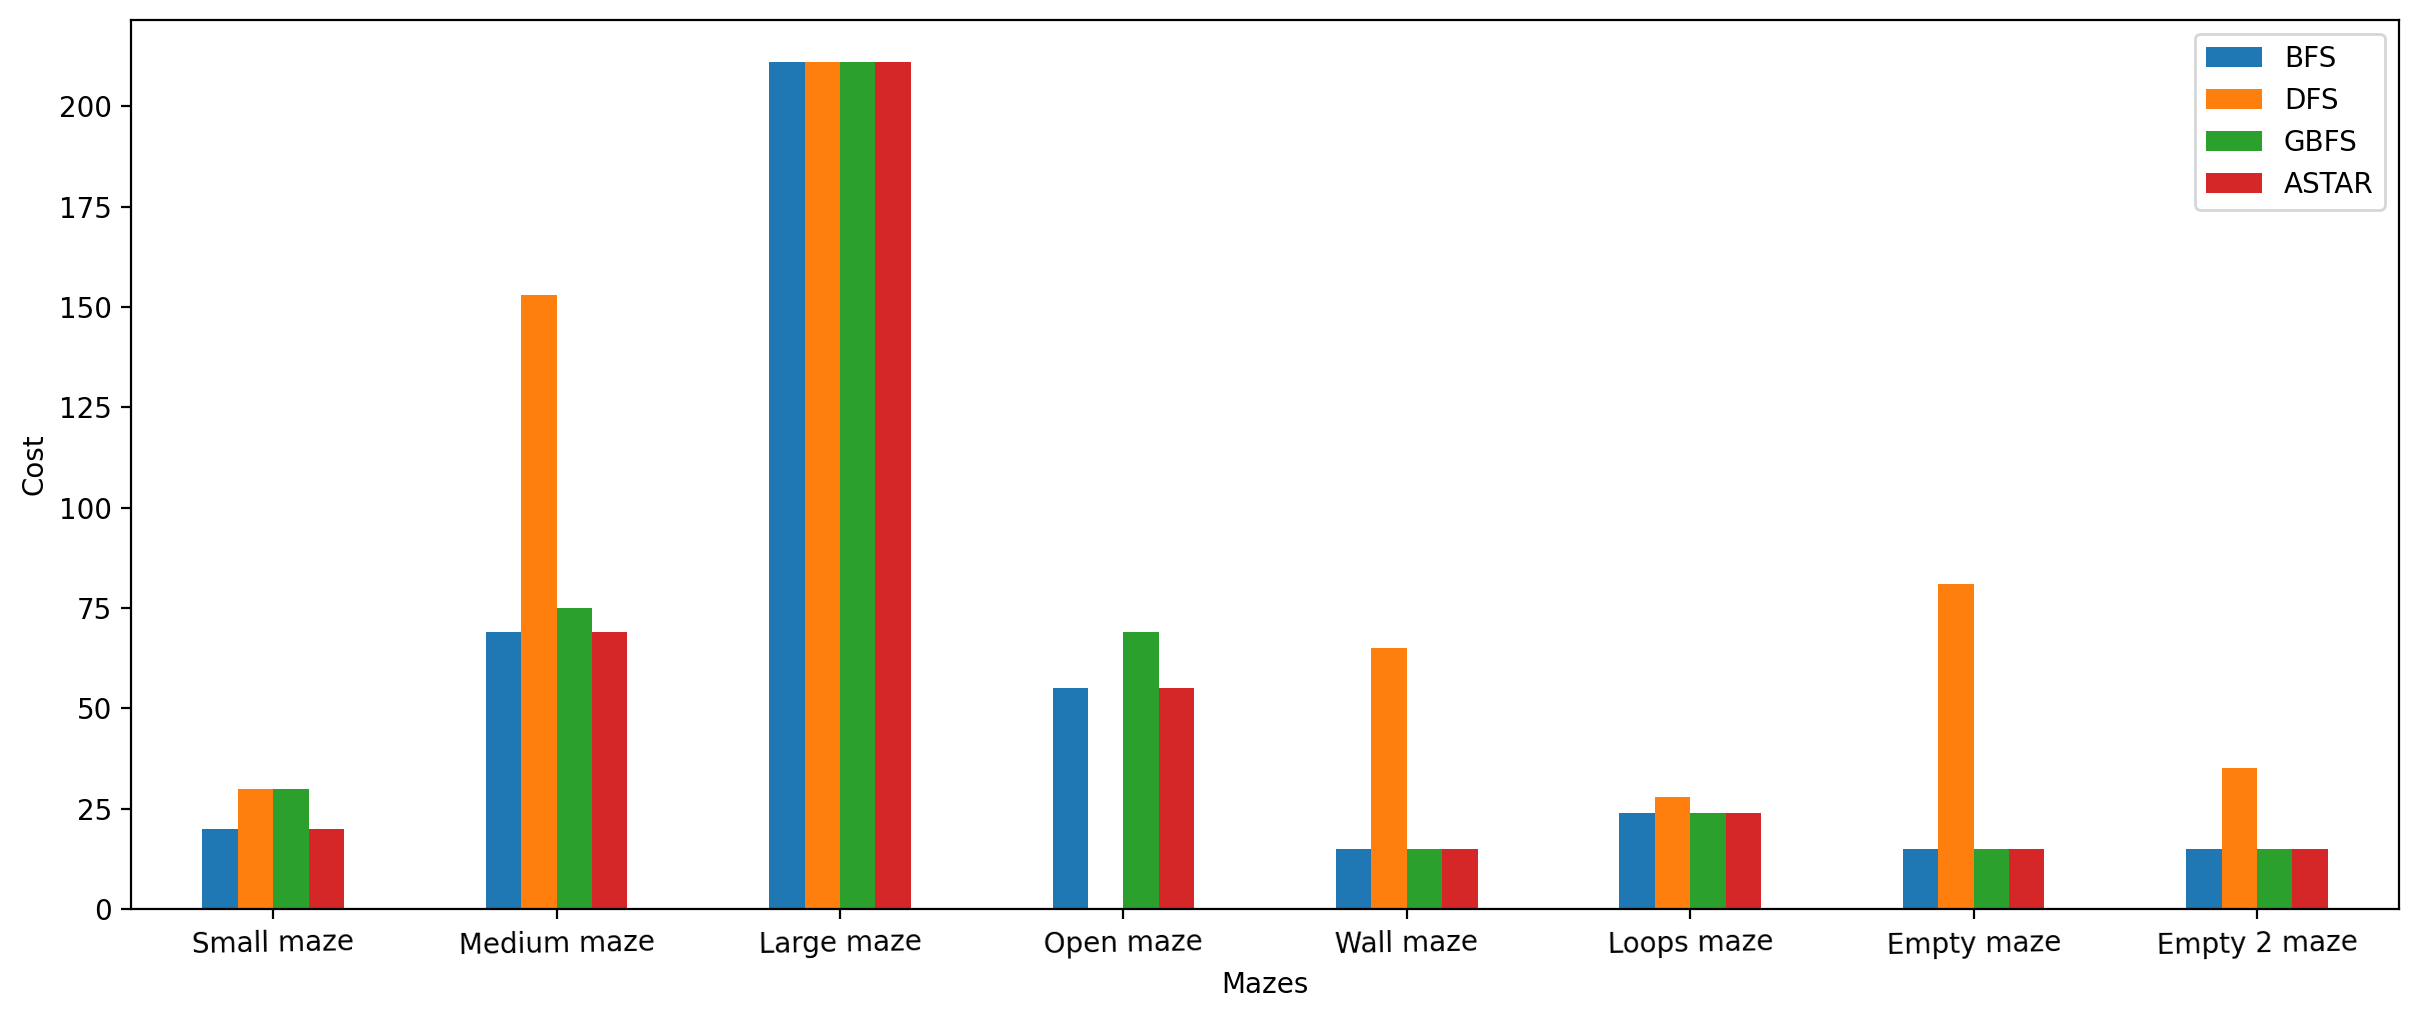

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

labels = ['Small maze', 'Medium maze', 'Large maze', 'Open maze', 'Wall maze', 'Loops maze', 'Empty maze', 'Empty 2 maze']

#BFS path costs
a = [20,69,211,55,15,24,15,15]
#DFS path costs
b = [30,153,211,None,65,28,81,35]
#GBFS path costs
c = [30,75,211,69,15,24,15,15]
#Astar path costs
d = [20,69,211,55,15,24,15,15]

df = pd.DataFrame({'BFS':a, 'DFS':b, 'GBFS':c, 'ASTAR':d}, index = labels)

df.plot.bar(rot=1, figsize=(12,5))
plt.tight_layout()
plt.xlabel('Mazes')
plt.ylabel('Cost')
plt.show()

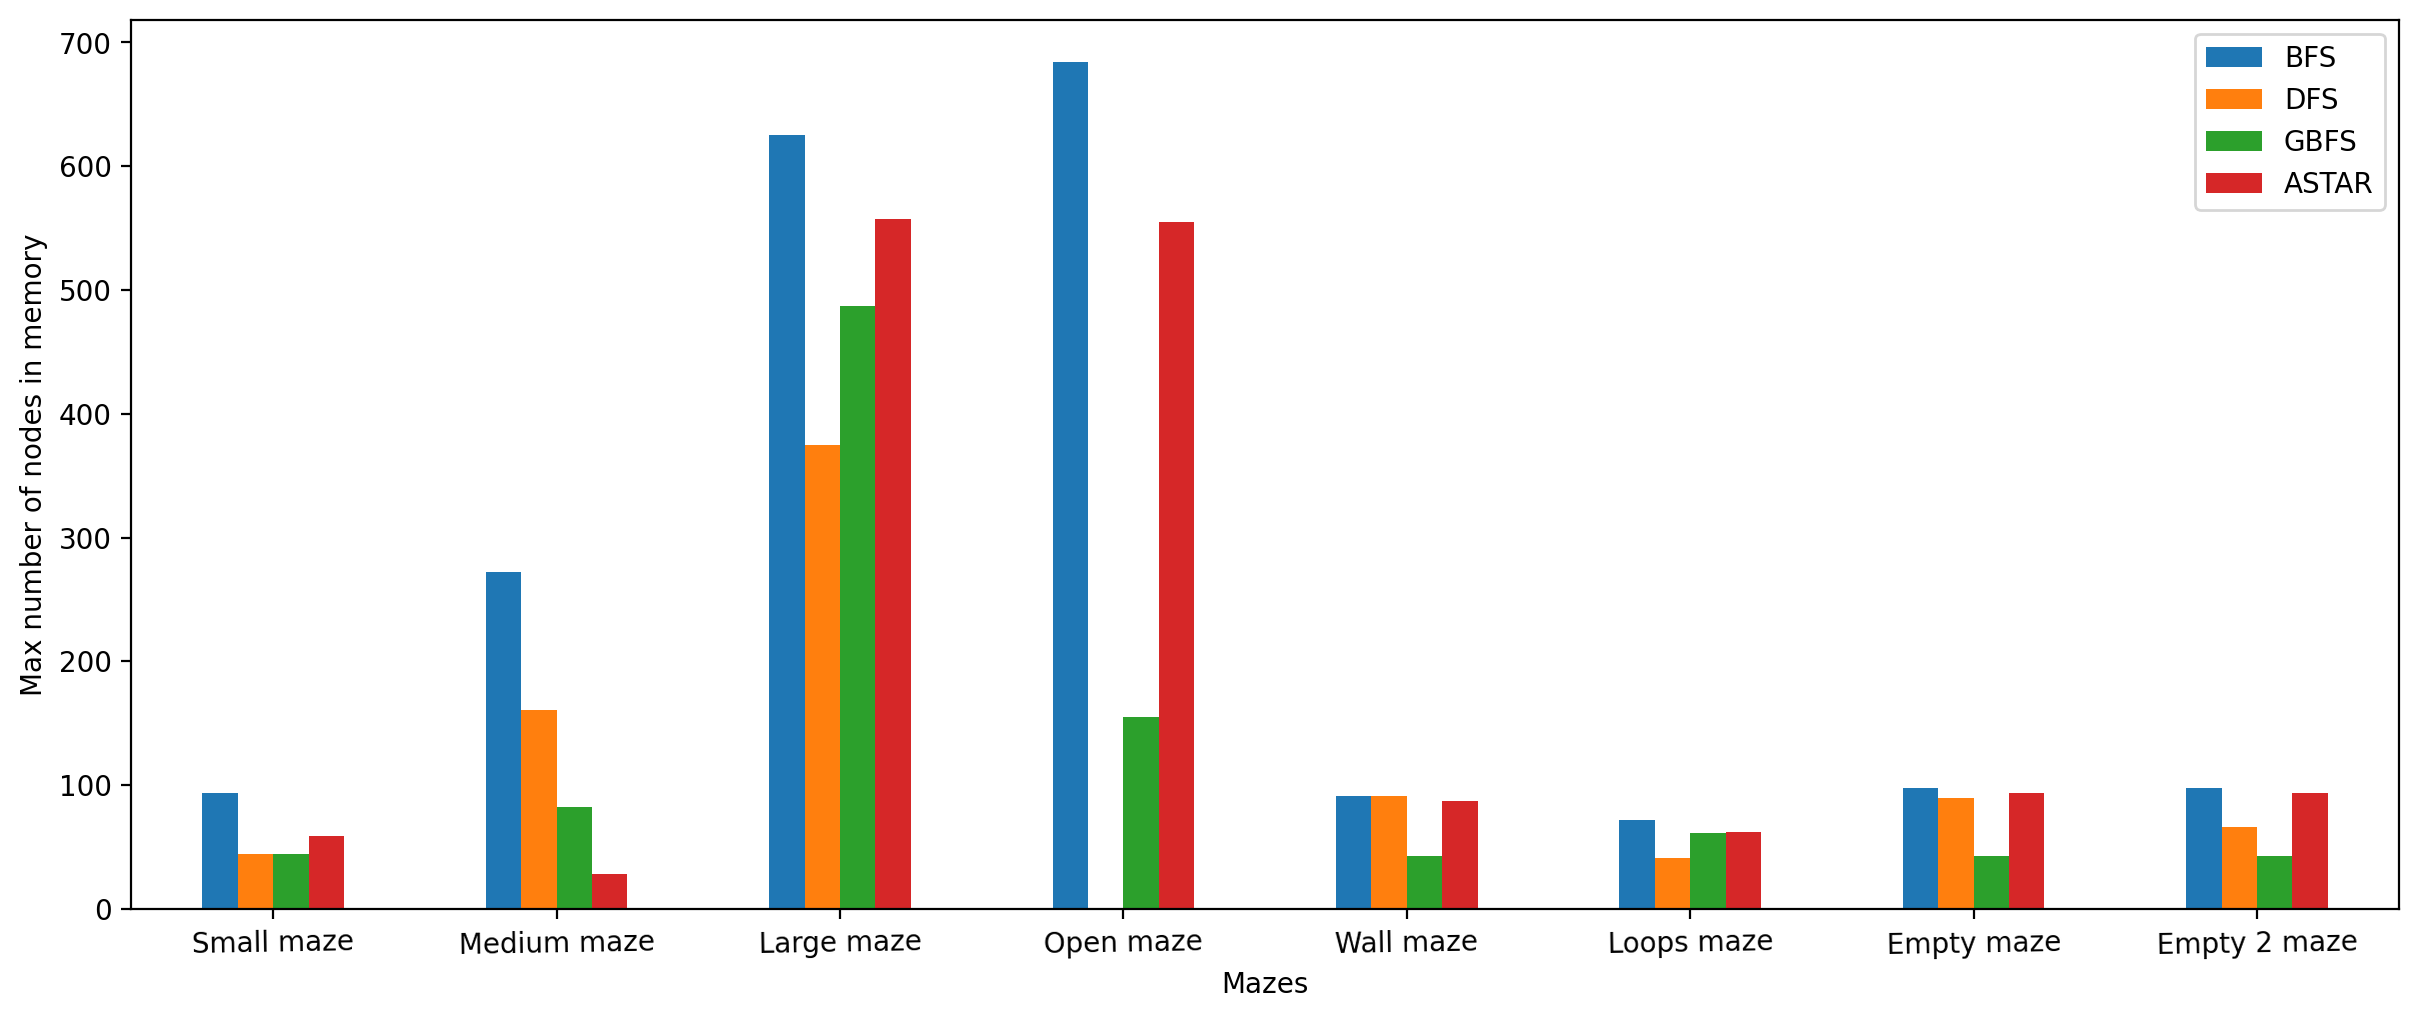

In [111]:
labels = ['Small maze', 'Medium maze', 'Large maze', 'Open maze', 'Wall maze', 'Loops maze', 'Empty maze', 'Empty 2 maze']

#Max number of nodes in memory
#BFS
a = [94,272,625,684,91,72,98,98]
#DFS
b = [44,161,375,None,91,41,90,66]
#GBFS
c = [44,82,487,155,43,61,43,43]
#ASTAR
d = [59,28,557,555,87,62,94,94]

df = pd.DataFrame({'BFS':a, 'DFS':b, 'GBFS':c, 'ASTAR':d}, index = labels)

df.plot.bar(rot=1, figsize=(12,5))
plt.tight_layout()
plt.xlabel('Mazes')
plt.ylabel('Max number of nodes in memory')
plt.show()

Discuss the most important lessons you have learned from implementing the different search strategies. 

Implementing these search strategies taught me a lot about different search algorithms and their strengths. One thing that I learned is that DFS substantially reduces the memory footprint of searching a graph. In all of my experiments, DFS consistently had fewer nodes in memory than BFS and when it had more than GBFS and ASTAR, the difference was only marginal. It did however, lead to higher cost solutions as shown in the first graph. In nearly all of the mazes, DFS led to the highest cost pathways to the goal. Another lesson I learned is that BFS consistently found the optimal solution, but had the largest memopry footprint. In my first graph, BFS had the shortest cost pathway for all of the mazes. It was simultaneously the largest bar in all of the mazes graphing the number of nodes in memory. GBFS had slightly less optimal solutions than BFS while retaining a smaller mempry footprint. ASTAR also found all of the optimal solutions like BFS, while having only a slightly lesser memory footprint. Overall, BFS excelled at finding optimal solutions, DFS excelling at minimizing memory, and GBFS and ASTAR were both middle grounds, with GBFS being more memory efficient at the sake of optimality, while ASTAR was perfectly optimal at the sake of memory efficiency.

## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Implement IDS (iterative deepening search using DFS)

2. Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

## IDS

In [55]:

import maze_helper as mh
import random

#We pass it the depth argument additionally which is the maximum node depth allowed for the search before it ends
#Instead of a reached structure, we will use 'get_path_from_root()' to cycle check
def deepDFS(currentNode, maze, depth):
    #initializing all the same variables as previously
    frontier = []
    mazes = []
    nodes = {}
    cost = 0
    #We also set a maxmimum count to catch loops
    count = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0

    #Appending the starting node to the node dictionary, mazes, and frontier
    frontier.append(currentNode)
    name = f'node{currentNode.pos}'
    nodes[name] = currentNode
    mazes.append(maze)
    #Default result of whether deepDFS was able to solve the maze or not
    result = False

    #While frontier is not empty and count is less than some value (to catch loops)
    while len(frontier) > 0 and count<1000:
        #Increment count
        count+=1
        maze = np.copy(maze)
        mazes.append(maze)
        #Finding max length of frontier
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)

        #Visualizing the frontier for debugging
        for node in frontier:
            x,y = node.pos
            if maze[x][y] != 'G' and maze[x][y] != 'S':
                maze[x][y] = 'F'

        #popping the currentt node in a LIFO order 
        currentNode = frontier.pop()
        currentPos = currentNode.pos

        #Setting the default depth that we will calculate a few lines down
        currentNode.depth=0

        #Getting maximum tree count
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount

        #Setting the depth for each node using the number of nodes in path from root
        for node in currentNode.get_path_from_root():
            currentNode.depth+=1
            
        #Visualizing the path for debugging
        for node in currentNode.get_path_from_root():
            x,y = node.pos
            if node not in frontier and maze[x][y] != 'G' and maze[x][y] != 'S':
                maze[x][y] = '.'

        #If the current node is the goal, adjusting the maze for visualization and then returning the results
        x,y = currentPos
        if maze[x][y] == 'G':
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze)
            print('Goal found!')
            #Changing the result to true if G was found
            result = True
            return result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth

        #If the current nodes depth is greater than the depth we passed as an argument, we restart the loop and pop the next node
        if currentNode.depth > depth:
            continue

        #If the north direction is valid (if its not a wall), then setting it as the child position
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) != 'X':
            childPos = (currentPos[0]-1, currentPos[1])
            #Cycle checking if the child is not in the current path from root
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                #Adding the node to the dictionary 
                nodes[name] = Node(childPos, currentNode, 'N', cost)

                #Adjusting the cost of the node
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                #Appending the node to the frontier 
                frontier.append(nodes[name])
                #Incrememnting nodes expanded
                nodesexpanded += 1

        #DOing all the same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) != 'X':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'E', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) != 'X':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'S', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) != 'X':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'W', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1
    #if the solution was not found, returning all the values and result=false
    return result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth
            

In [56]:
#This iterates through the previous deepening DFS by incrementing the depth
#This will lead to the iterative deepening search 
def IDS(node1, maze, depth):
    #Incrementing the depth by 1 up to a high number 
    for x in range(0,10000):
        depth+=1
        result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = deepDFS(node1, maze, depth)
        #If it finds the result, (if the result is true), then returns the values
        if result == True:
            return result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth

Goal found!
Depth: 19
Number of nodes expanded: 83
Max frontier: 6
Max tree: 20
Nodes in memory: 51
Node - pos = (8, 1); action = W; cost = 20; hn = 1000000


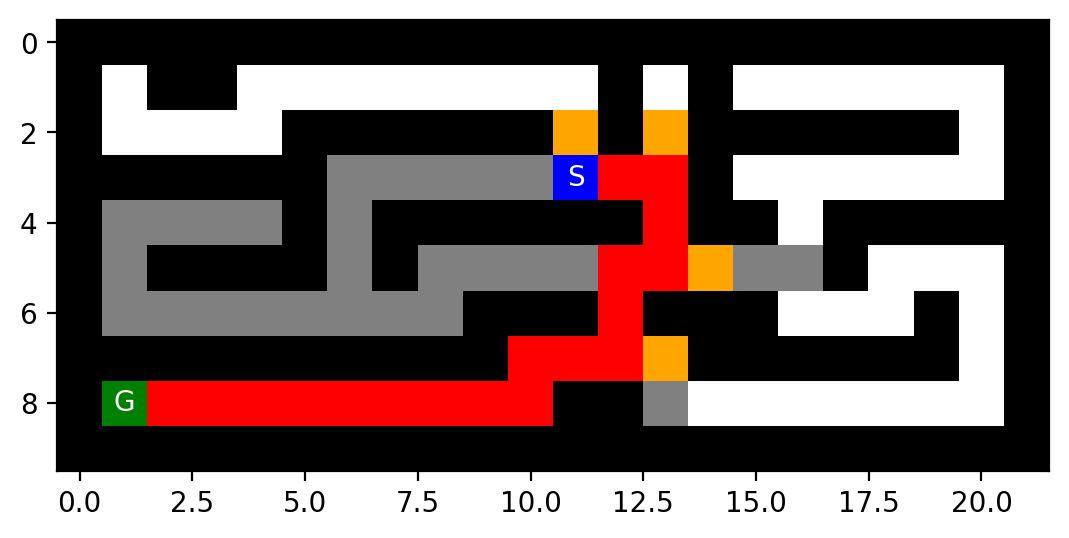

In [57]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Depth: 68
Number of nodes expanded: 565
Max frontier: 8
Max tree: 69
Nodes in memory: 247
Node - pos = (16, 1); action = W; cost = 69; hn = 1000000


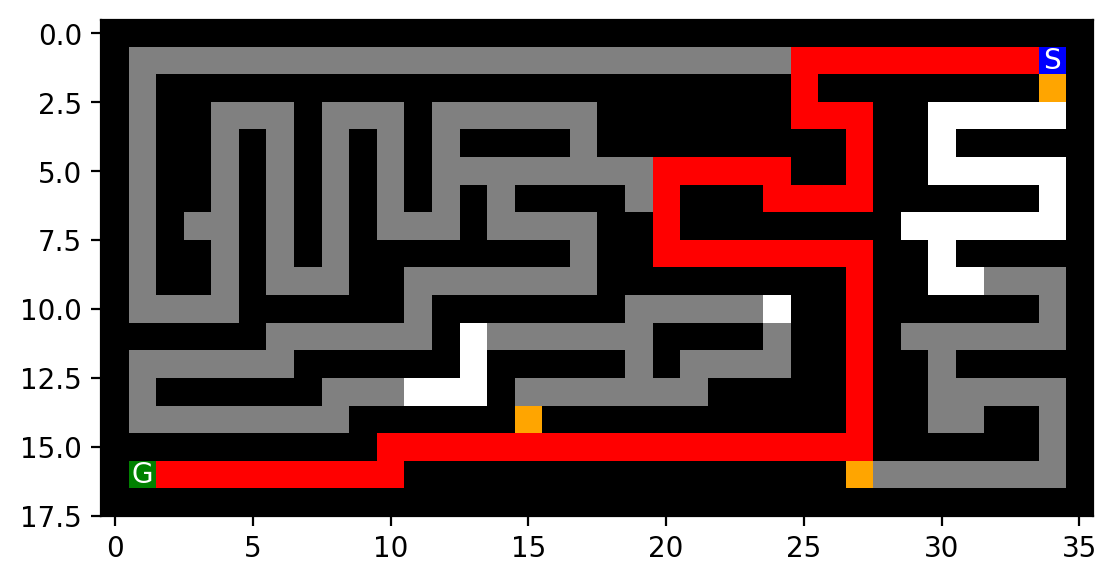

In [58]:
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Depth: 210
Number of nodes expanded: 370
Max frontier: 38
Max tree: 211
Nodes in memory: 371
Node - pos = (35, 1); action = S; cost = 211; hn = 1000000


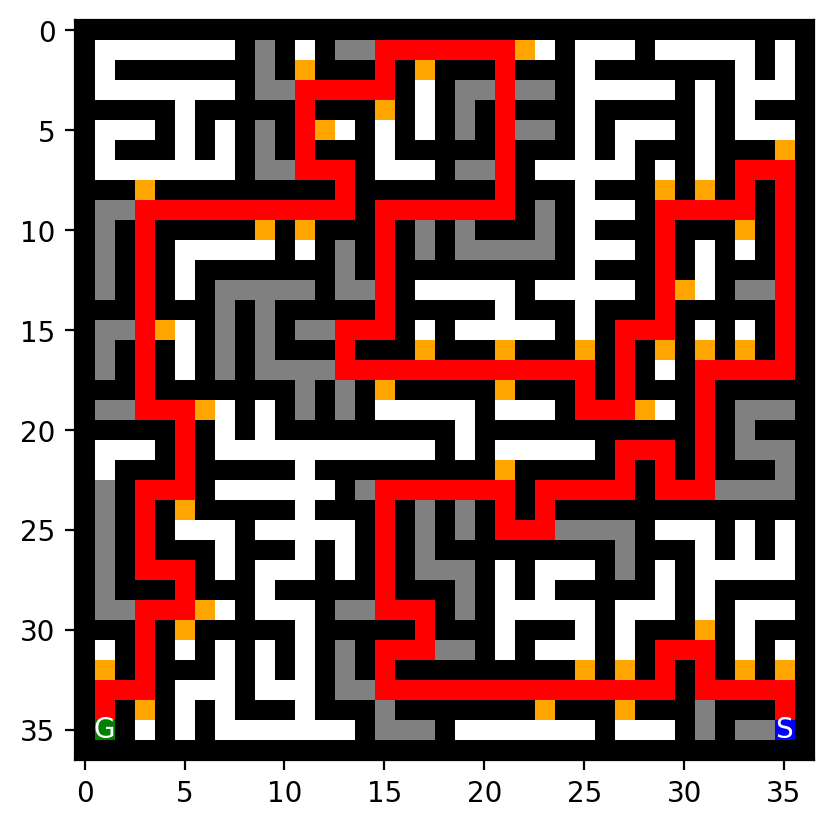

In [59]:
with open("large_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

In [ ]:
with open("open_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Depth: 18
Number of nodes expanded: 746
Max frontier: 22
Max tree: 19
Nodes in memory: 52
Node - pos = (2, 9); action = N; cost = 19; hn = 1000000


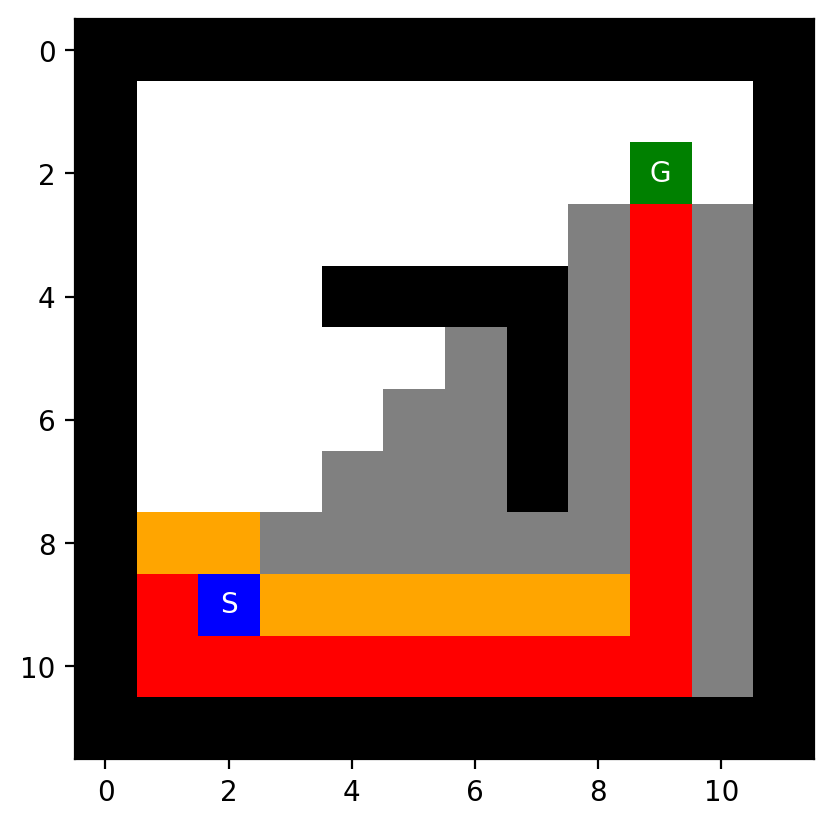

In [60]:
with open("wall_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Depth: 23
Number of nodes expanded: 118
Max frontier: 10
Max tree: 24
Nodes in memory: 46
Node - pos = (1, 1); action = N; cost = 24; hn = 1000000


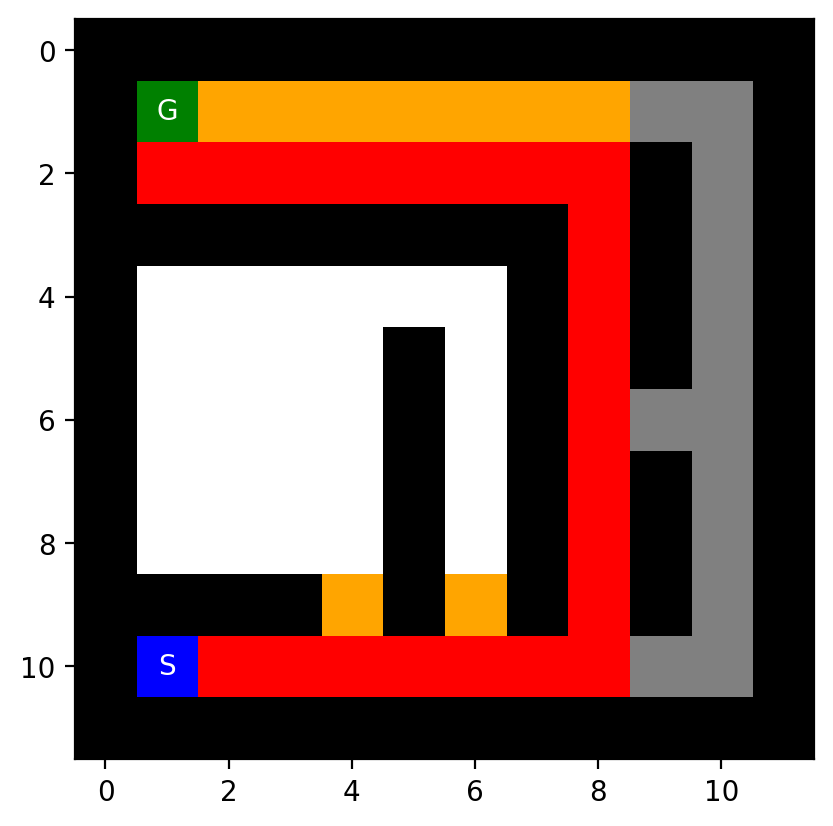

In [61]:
with open("loops_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Depth: 20
Number of nodes expanded: 785
Max frontier: 25
Max tree: 21
Nodes in memory: 56
Node - pos = (2, 9); action = N; cost = 21; hn = 1000000


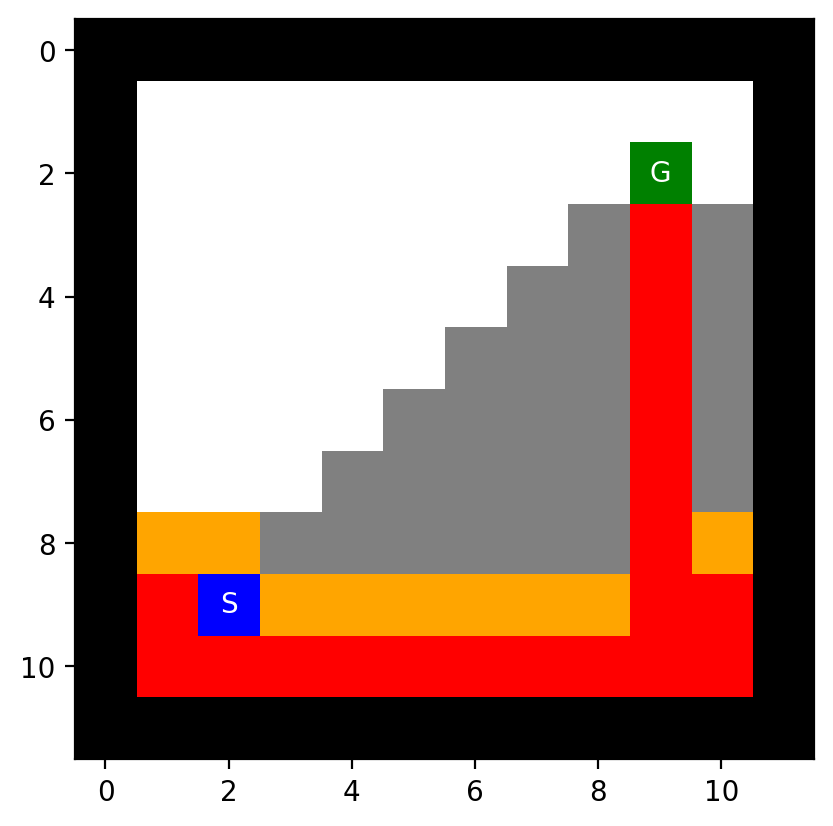

In [62]:
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Depth: 14
Number of nodes expanded: 238
Max frontier: 25
Max tree: 15
Nodes in memory: 47
Node - pos = (9, 2); action = S; cost = 15; hn = 1000000


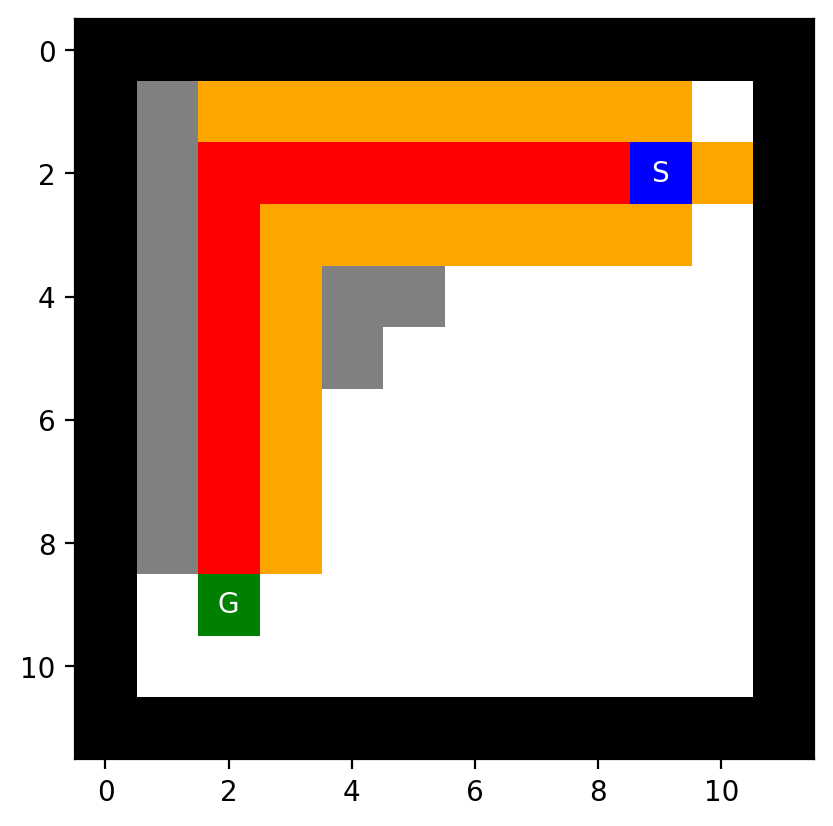

In [63]:
with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

## IDS found the optimal solution

IDS found the optimal solution for all of these mazes, as it returned the first solution it found at the lowest depth via its incrementing of the depth.

## Multiple Goal Mazes

#### Adjusting BFS, DFS, and IDFS to search for 3 goals...

In [64]:
import maze_helper as mh

#This is almost identical to the BFS with a few adjustments
def BFS2(startNode, maze):
    #Creating all of our variables
    frontier = []
    reached = []
    mazes = []
    nodes = {}
    cost = 0
    #Declaring a goal count for the function (this will increment until it reaches 3 )
    goalcount = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0

    #Adding starting node to maze, frontier, reached, and dicitonary 
    frontier.append(startNode)
    reached.append(startNode.pos)
    name = f'node{startNode.pos}'
    nodes[name] = startNode
    mazes.append(maze)

    #while the frontier not empty
    while len(frontier) > 0:
        maze = np.copy(maze)
        mazes.append(maze)

        #Getting max frontier length
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)
            
        #visualizing reached and frontier for debugging
        for x,y in reached:
            if maze[x][y] !=  'G' and maze[x][y] != 'S' and maze[x][y] != 'P':
                maze[x][y] = '.'
        for node in frontier:
            x,y = node.pos
            if maze[x][y] != 'G' and maze[x][y] != 'S':
                maze[x][y] = 'F'
        
        #popping node from the front in FIFO order
        currentNode = frontier.pop(0)
        currentPos = currentNode.pos


        treecount = 0 
        #getting max tree count 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount

        #If the current node is a goal, incrementing goal count by 1
        x,y = currentNode.pos
        if maze[x][y] == 'G':
            goalcount += 1
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze) 
            print('Goal found!')
            #If the goalcount reached 3, then the maze is solved
            if goalcount == 3:
                return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree
        
        #If north valid, considering it as child node
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]-1, currentPos[1])) == 'G':
            childPos = (currentPos[0]-1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'
                #If childnode not in reached, adding it to dictionary 
                nodes[name] = Node(childPos, currentNode, 'N', cost)
                newcost = 0
                #Adjusting cost 
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                #Appending frontier and reached with node
                frontier.append(nodes[name])
                reached.append(childPos)
                #Incrementing nodes expanded
                nodesexpanded += 1

        #Doing all the same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]+1)) == 'G':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in reached:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'E', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1
        
        #Doing all the same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) == ' ' or mh.look(maze, (currentPos[0]+1, currentPos[1])) == 'G':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in reached:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'S', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1
        
        #Doing the same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) == ' ' or mh.look(maze, (currentPos[0], currentPos[1]-1)) == 'G':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in reached:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'W', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                reached.append(childPos)
                nodesexpanded += 1

In [74]:

import maze_helper as mh
import random

#Again, the only difference is the goal count value
#This time, we dont use reached structure
def DFS2(currentNode, maze):
    #Declaring variables
    frontier = []
    count = 0
    mazes = []
    nodes = {}
    cost = 0
    goalcount = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0
    #Appending starting node to dictionary, maze, and frontier
    frontier.append(currentNode)
    name = f'node{currentNode.pos}'
    nodes[name] = currentNode
    mazes.append(maze)

    #While frontier is empty and count is less than a high number to catch loops
    while len(frontier) > 0 and count < 1000:
        #increment count for loop catcher
        count += 1 
        maze = np.copy(maze)
        mazes.append(maze)

        #getting max length of fronteir
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)

        #adjusting maze for visualization and debugging
        for node in frontier:
            x,y = node.pos
            if maze[x][y] != 'G' and maze[x][y] != 'S' and maze[x][y] != 'P':
                maze[x][y] = 'F'

        #popping node in LIFO order
        currentNode = frontier.pop()
        currentPos = currentNode.pos

        #Getting max tree length 
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount

        #ADjusting maze simply for debuggin and visualization
        #This is of course not taken into account when deciding children
        #We will have to cycle check for that
        for node in currentNode.get_path_from_root():
            x,y = node.pos
            if node not in frontier and maze[x][y] != 'G' and maze[x][y] != 'S' and maze[x][y] != 'P':
                maze[x][y] = '.'

        #If the node is the goal, increment goal count
        x,y = currentPos
        if maze[x][y] == 'G':
            goalcount+=1
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze)
            print('Goal found!')
            #If goal count reaches 3, return values
            if goalcount == 3:
                return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree

        #Checking if north direction is valid and then considering it as child node
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) != 'X':
            childPos = (currentPos[0]-1, currentPos[1])
            #Cycle checking by checking if the child node is in the path from root
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                #Appending dictionary with node
                nodes[name] = Node(childPos, currentNode, 'N', cost)
                #getting cost of node
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                #Appending frontier
                frontier.append(nodes[name])
                #Incrementing nodes expanded
                nodesexpanded += 1

        #Doing the same for east 
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) != 'X':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'E', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) != 'X':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'S', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) != 'X':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'W', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1
    #If not found (from loop mainly), returning values anyway
    return currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree
            

In [66]:

import maze_helper as mh
import random

#Again, the biggest difference is the goal count and cycle checking because we don't use a reached structure
#We also added depth just like IDS
#This depth will be incremented to create IDS for multiple nodes later in the project
def deepDFS2(currentNode, maze, depth):
    #Declaring variables
    frontier = []
    mazes = []
    nodes = {}
    cost = 0
    count = 0
    #Goal count for finding three goals
    goalcount = 0
    maxfrontier = 0
    nodesexpanded = 0
    maxtree = 0

    #Appending starting node to all of our structures
    frontier.append(currentNode)
    name = f'node{currentNode.pos}'
    nodes[name] = currentNode
    mazes.append(maze)
    #Default result = false, will change to true if we found all the goals
    result = False

    #While frontier isnt empty and count is less than a high number (to catch loops)
    while len(frontier) > 0 and count<1000:
        maze = np.copy(maze)
        mazes.append(maze)
        #incrementing count for loop catcher
        count+=1

        #Getting max length of frontier
        if len(frontier) > maxfrontier:
            maxfrontier = len(frontier)

        #Visualizing frontier purely for visualization and debugging
        for node in frontier:
            x,y = node.pos
            if maze[x][y] != 'G' and maze[x][y] != 'S' and maze[x][y] != 'P':
                maze[x][y] = 'F'

        #Getting node from frontier in LIFO order
        currentNode = frontier.pop()
        currentPos = currentNode.pos

        #default depth of the node is 0, we will adjust this later
        currentNode.depth=0

        #Getting the max tree length
        treecount = 0 
        for node in currentNode.get_path_from_root():
            treecount+=1
        if treecount >= maxtree:
            maxtree = treecount

        #Getting the depth for the current node, we will check that this depth is less than the depth we passed the function
        for node in currentNode.get_path_from_root():
            currentNode.depth+=1
            
        #Visualizing get_path_from_root() purely for debugging
        for node in currentNode.get_path_from_root():
            x,y = node.pos
            if node not in frontier and maze[x][y] != 'G' and maze[x][y] != 'S' and maze[x][y] != 'P':
                maze[x][y] = '.'

        x,y = currentPos
        
        #If the current node is a goal, incrementing goal count
        if maze[x][y] == 'G':
            goalcount += 1
            for i in currentNode.get_path_from_root():
                x,y = i.pos
                if maze[x][y] != 'S' and maze[x][y] != 'G':
                    maze[x][y] = 'P'
                    mazes.append(maze)
            #If the goal count reaches three, return values and change result to True
            if goalcount == 3:
                result = True
                return result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth
            else:
                maze[x][y] = 'S'
                for node in currentNode.get_path_from_root():
                    if node in frontier:
                        frontier.remove(node)
                continue

        #If the current node depth is greater than the depth we passed it, repeat the while loop and pop the next node
        if currentNode.depth > depth:
            continue

        #Checking if north is valid (not a wall)
        if mh.look(maze, (currentPos[0]-1, currentPos[1])) != 'X':
            childPos = (currentPos[0]-1, currentPos[1])
            #Cycle checking the child node to see if its in the path from root
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                #Appending the dictionary with the new node 
                nodes[name] = Node(childPos, currentNode, 'N', cost)
                #Getting the cost of the node
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                #appending the frontier and incrementing the nodes expanded 
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for east
        if mh.look(maze, (currentPos[0], currentPos[1]+1)) != 'X':
            childPos = (currentPos[0], currentPos[1]+1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'E', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for south
        if mh.look(maze, (currentPos[0]+1, currentPos[1])) != 'X':
            childPos = (currentPos[0]+1, currentPos[1])
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'S', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1

        #Doing the same for west
        if mh.look(maze, (currentPos[0], currentPos[1]-1)) != 'X':
            childPos = (currentPos[0], currentPos[1]-1)
            if childPos not in [i.pos for i in currentNode.get_path_from_root()]:
                name = f'node{childPos}'
                nodes[name] = Node(childPos, currentNode, 'W', cost)
                newcost = 0
                for node in nodes[name].get_path_from_root():
                    newcost += 1
                nodes[name].cost = newcost
                frontier.append(nodes[name])
                nodesexpanded += 1
    #If no solution found, returning result=False and all the other parameters
    return result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth
            

In [67]:
#Similar to last IDS
def IDS2(node1, maze, depth):
    #Incrementing depth from 1 to a high number until a solution is found 
    for x in range(0,10000):
        depth+=1
        result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = deepDFS2(node1, maze, depth)
        #If the depth led to a solution, returning all the values
        if result == True:
            return result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth

Goal found!
Goal found!
Goal found!
Depth: 14
Number of nodes expanded: 271
Max frontier: 9
Max tree: 69
Nodes in memory: 272
Node - pos = (16, 1); action = W; cost = 69; hn = 1000000


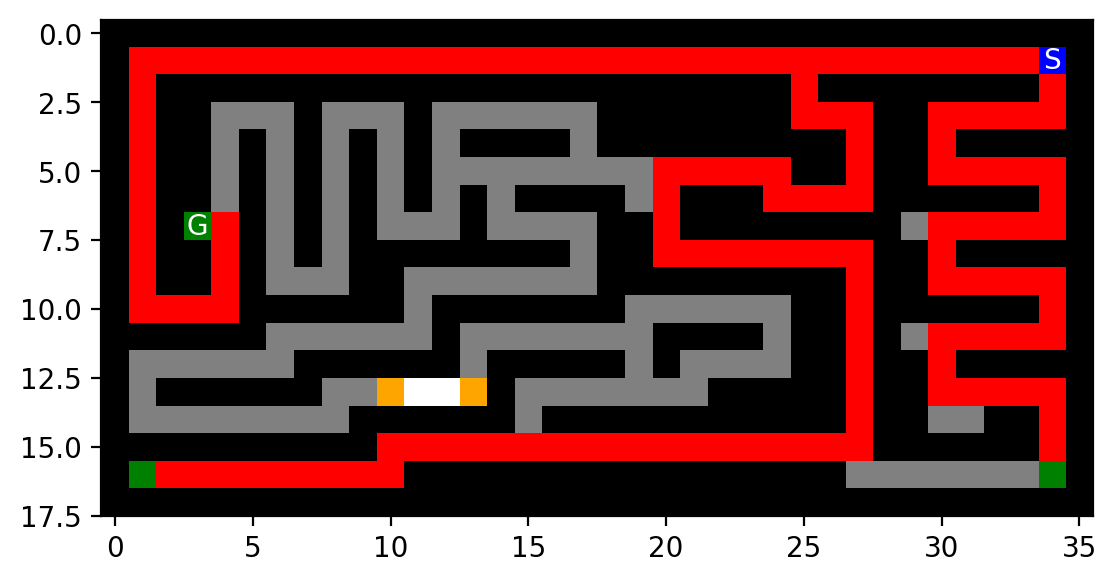

In [68]:
with open("medium_maze_3.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree = BFS2(node1, maze)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Goal found!
Goal found!
Goal found!
Depth: 68
Number of nodes expanded: 180
Max frontier: 8
Max tree: 158
Nodes in memory: 181
Node - pos = (16, 34); action = E; cost = 158; hn = 1000000


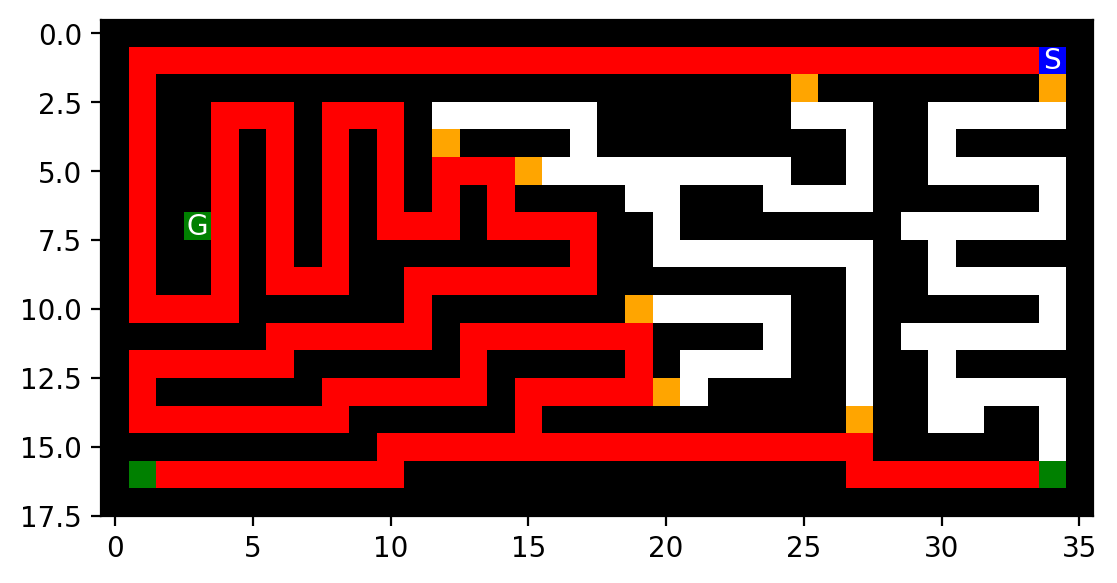

In [75]:
with open("medium_maze_3.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree = DFS2(node1, maze)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
mh.show_maze(mazes[-1])

Depth: 68
Number of nodes expanded: 533
Max frontier: 8
Max tree: 69
Nodes in memory: 227
Node - pos = (16, 1); action = W; cost = 69; hn = 1000000


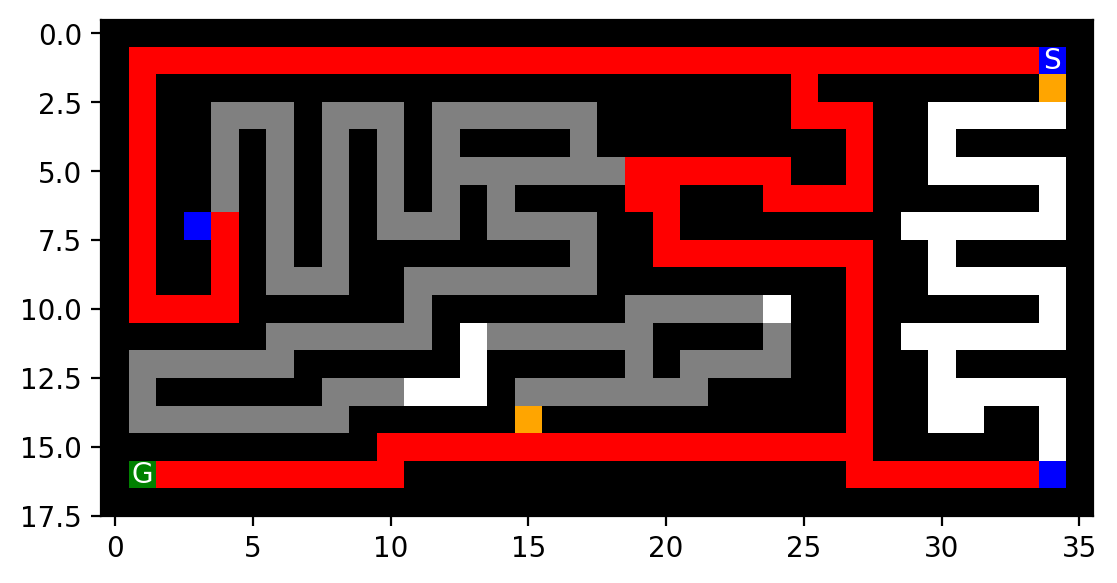

In [70]:
with open("medium_maze_3.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

start = mh.find_pos(maze, what='S')
node1 = Node(start, None, None, 0)

result, currentNode, mazes, nodes, nodesexpanded, maxfrontier, maxtree, depth = IDS2(node1, maze, 1)
print('Depth:', depth)
print("Number of nodes expanded:", nodesexpanded)
print("Max frontier:", maxfrontier)
print('Max tree:', maxtree)
print('Nodes in memory:', len(nodes))
print(currentNode)
newmaze = mazes[-1]
mh.show_maze(newmaze)

We changed the goal color so that the same goal was not searched for twice

# Discussion of the multiple goal mazes

BFS2 found all of the optimal solutions for the goals, IDS2 found several optimal solutions to the goals, and DFS2 found none. However, IDS2 and BFS2 both found the minimum cost for the maximum furthest goal. In this way, they both were optimal as the worst case cost was 69 for both of them. IDS2 just didn't find a shorter path for one of the intermediate goals. This is because BFS2, at the expense of its memory, searches the entire space and finds the lowest cost solution. IDS2 is similar, and increments its depth to find the lowest cost solution, but sometimes doesn't consdier all possible pathways. An example is the right-most pathway on BFS2 is red, but on IDS2, it isnt. This is because IDS2 did not consider that pathway, as it was considering others first. They were both however optimal in finding the minimum cost for the maximum furthest goal of all the three goals.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [71]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [72]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [73]:
# Your code/answer goes here